## Линейные модели в машинном обучении

Необходимо разработать модель машинного обучения, которая поможет владельцу молочного хозяйства «Вольный луг» управлять рисками и принимать объективное решение о покупке бурёнок. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям.


### План работы

1. Изучение общей информации:
    - Пропущенные значения
    - Неправильные типы данных


2. Предобработка данных:
    - Замена названий столбцов
    - Удаление возможных дубликатов
    - Изменение типов данных
    
    
3. Исследовательский анализ данных
    - Статистический анализ всех признаков
    - Поиск возможных аномалий и выбросов
    - С какими признаками связан малый и большой удой?


4. Корреляционный анализ признаков в датасете ferma_main.csv
    - Взаимосвязь между признаками
    - Диаграммы рассеяния для признака удой_кг и всех количественных признаков
    
    
5. Задача регрессии
    - Подготовка данных и обучение на них первой модели
    - Подготовка данных, преобразование входного признака и обучение на них второй модели
    - Добавить в данные новый признак и обучить на них третью модель
    - Сравнение качества трёх моделей линейной регрессии
    - Прогнозированние удоя коров, которых хочет купить фермер


6. Задача классификации
    - Подготовить данные датасета ferma_main.csv и обучить на них модель
    - Оценить качество модели логистической регрессии
    - С помощью обученной модели спрогнозировать вкус молока коров, которых фермер хочет купить
    
    
7. Итоговый вывод


### Описание данных


- **`ferma_main.csv`** содержит данные о стаде фермера на текущий момент
    - `id` — уникальный идентификатор коровы.
    - `Удой, кг` — масса молока, которую корова даёт в год (в килограммах).
    - `ЭКЕ (Энергетическая кормовая единица)` — показатель питательности корма коровы.
    - `Сырой протеин, г` — содержание сырого протеина в корме (в граммах).
    - `СПО (Сахаро-протеиновое соотношение)` — отношение сахара к протеину в корме коровы.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Жирность,%` — содержание жиров в молоке (в процентах).
    - `Белок,%` — содержание белков в молоке (в процентах).
    - `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    - `Возраст` — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).
    
  
- **`ferma_dad.csv`** содержит имя папы каждой коровы в стаде фермера.
    - `id` — уникальный идентификатор коровы.
    - `Имя Папы` — имя папы коровы.
    
  
- **`cow_buy.csv`** содержит данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой.
    - `Порода` — порода коровы.
    - `Тип пастбища` — ландшафт лугов, на которых паслась корова.
    - `порода папы_быка` — порода папы коровы.
    - `Имя_папы` — имя папы коровы.
    - `Текущая_жирность,%` — содержание жиров в молоке (в процентах).
    - `Текущий_уровень_белок,%` — содержание белков в молоке (в процентах).
    - `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).


Данные в файлах **`ferma_main.csv`** и **`cow_buy.csv`** похожи, но у датасета **`cow_buy.csv`** несколько особенностей:
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)` отсутствуют.
- Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на `5%`. 
- Кроме того, отсутствуют признаки `Удой, кг` и `Вкус молока`. Это целевые признаки, именно их предстоит предсказать.

In [3]:
!pip install -r requirements.txt

  Using cached pandas-1.2.4-cp39-cp39-manylinux1_x86_64.whl.metadata (4.7 kB)
  Using cached numpy-1.20.1-cp39-cp39-manylinux2010_x86_64.whl.metadata (2.0 kB)
  Using cached matplotlib-3.3.4-cp39-cp39-manylinux1_x86_64.whl.metadata (5.7 kB)
  Using cached seaborn-0.11.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
Using cached pandas-1.2.4-cp39-cp39-manylinux1_x86_64.whl (9.7 MB)
Using cached numpy-1.20.1-cp39-cp39-manylinux2010_x86_64.whl (15.4 MB)
Using cached matplotlib-3.3.4-cp39-cp39-manylinux1_x86_64.whl (11.5 MB)
Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
Using cached scikit_learn-1.6.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 6.2 MB/s eta 0:00:0000:0

In [4]:
import phik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, \
    accuracy_score, precision_score,recall_score, confusion_matrix 

## Изучение общей информации

In [5]:
def parse_dataset(path, sep=','):
    df = pd.read_csv(path, sep=sep)

    display(df.head())
    
    print('\nПроцент пропусков')
    display((df.isna().mean()*100).sort_values(ascending=False))
    df.info()

    
    return df

In [6]:
main = parse_dataset('./datasets/ferma_main.csv', sep=';')

id  Удой, кг ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                  14,2              1743   
1   2      5529                                  12,8              2138   
2   3      5810                                    14              1854   
3   4      5895                                  12,4              2012   
4   5      5302                                  12,8              1675   

  СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0,89   Вис Бик Айдиал    Равнинное   
1                                 0,89   Вис Бик Айдиал    Равнинные   
2                                0,885  РефлешнСоверинг    Холмистое   
3                                0,885  РефлешнСоверинг    Холмистое   
4                                0,885   Вис Бик Айдиал    Равнинные   

  порода папы_быка Жирность,% Белок,% Вкус молока      Возраст  
0           Айдиал       3,58   3,076      вкусно  более_2_лет  
1          Соверин       3,54   3,079      вкусно  менее_2_лет  
2          Соверин       3,59   3,074   не вкусно  более_2_лет  
3           Айдиал        3,4   3,075   не вкусно  более_2_лет  
4          Соверин       3,73   3,073      вкусно  менее_2_лет


Процент пропусков


RuntimeError: module was compiled against NumPy C-API version 0x10 (NumPy 1.23) but the running NumPy has C-API version 0xe. Check the section C-API incompatibility at the Troubleshooting ImportError section at https://numpy.org/devdocs/user/troubleshooting-importerror.html#c-api-incompatibility for indications on how to solve this problem.

id                                       0.0
Удой, кг                                 0.0
ЭКЕ (Энергетическая кормовая единица)    0.0
Сырой протеин, г                         0.0
СПО (Сахаро-протеиновое соотношение)     0.0
Порода                                   0.0
Тип пастбища                             0.0
порода папы_быка                         0.0
Жирность,%                               0.0
Белок,%                                  0.0
Вкус молока                              0.0
Возраст                                  0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

Пропуски в таблице **`main`** отсутствуют. Неправильные типы данных у столбцов `ЭКЕ`, `СПО`, `Жирность,% `, `Белок,%`. Столбцы `Тип пастбища` и `порода папы_быка` имеют в данных аномальные значения. У `Тип пастбища` значение 'Равнинные' следует заменить на 'Равнинное', у `порода папы_быка` значение 'Айдиалл' следует заменить на 'Айдиал'. Данные столбцы имеют по два значения, но так-как одно значение не является противоположностью другого, то они не будут преобразованы в булевый тип. А вот столбцы `Вкус молока` и `Возраст` преобразовать в булевый тип стоит. Необходимо привести названия столбцов согласно стандартам оформления. 

In [7]:
dad = parse_dataset('./datasets/ferma_dad.csv', sep=';')

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин


Процент пропусков


id          0.0
Имя Папы    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


Пропуски в таблице **`dad`** отсутствуют. Необходимо привести название столбца к нижнему змеиному регистру.

In [8]:
cow_buy = parse_dataset('./datasets/cow_buy.csv', sep=';')

Порода Тип пастбища порода папы_быка  Имя_папы Текущая_жирность,%  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес               3,58   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный               3,54   
2  РефлешнСоверинг    равнинное          Соверин     Барин               3,59   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный                3,4   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный               3,64   

  Текущий_уровень_белок,%      Возраст  
0                   3,076  более_2_лет  
1                   3,081  менее_2_лет  
2                   3,074  более_2_лет  
3                   3,061  более_2_лет  
4                   3,074  более_2_лет


Процент пропусков


Порода                     0.0
Тип пастбища               0.0
порода папы_быка           0.0
Имя_папы                   0.0
Текущая_жирность,%         0.0
Текущий_уровень_белок,%    0.0
Возраст                    0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Пропуски в таблице **`cow_buy`** отсутствуют. Неправильные типы данных у столбцов `Текущая_жирность,%`, `Текущий_уровень_белок,%`, `Возраст`. Также название столбцов стоит заменить согласно стандартам оформления.

### Вывод по общей информации 

1. Датасет **`main`** 
    - Неправильные типы данных:
        - `ЭКЕ (Энергетическая кормовая единица)` преобразовать во float
        - `СПО (Сахаро-протеиновое соотношение)` преобразовать во float
        - `Жирность,%` преобразовать во float
        - `Белок,%` преобразовать во float
        - `Вкус молока` преобразовать в boolean, где вкусно - True, не вкусно - False
        - `Возраст` преобразовать в boolean, где более 2 лет - True, менее 2 лет - False
        
        
        
2. Датасет **`cow_buy`**
    - Неправильные типы данных:
        - `Текущая_жирность,%` преобразовать во float 
        - `Текущий_уровень_белок,%` преобразовать во float
        - `Возраст` преобразовать в boolean, где более 2 лет - True, менее 2 лет - False
        
В каждой из 3 таблиц стоит изменить названия стобцов, привести столбцы-категории к типу category. Пропусков в таблицах нет.

##  Предобработка данных

### Замена названий столбцов 

In [9]:
# Преобразование названий столбцов
def get_clm(clm):
    # проверка на аббревиатуру
    k = 0
    
    for s in clm:
        if s.isupper():
            k += 1
        else:
            break
            
    if k >= 2:
        clm = clm[:k]
        return clm
        
    return clm.lower().replace("%", " %").replace(" ", "_").replace(",", "")

In [10]:
main = (main
        .rename(columns = get_clm)
        .rename({'вкус_молока':'вкусное_молоко'}, axis=1))

main.columns

Index(['id', 'удой_кг', 'ЭКЕ', 'сырой_протеин_г', 'СПО', 'порода',
       'тип_пастбища', 'порода_папы_быка', 'жирность_%', 'белок_%',
       'вкусное_молоко', 'возраст'],
      dtype='object')

In [11]:
dad = dad.rename(columns = get_clm)
dad.columns

Index(['id', 'имя_папы'], dtype='object')

In [12]:
cow_buy = (cow_buy
           .rename(columns = get_clm)
           .rename({'текущий_уровень_белок_%':'текущий_белок_%'}, axis=1))

cow_buy.columns

Index(['порода', 'тип_пастбища', 'порода_папы_быка', 'имя_папы',
       'текущая_жирность_%', 'текущий_белок_%', 'возраст'],
      dtype='object')

Названия были приведены к нижнему змеиному регистру, аббревиатуры оставлены в верхнем регистре. В датасете **`main`** название столбца `вкус_молока` было заменено на `вкусное_молоко`, а в датасете **`cow_buy`** название столбца `текущий_уровень_белок_%` было заменено на `текущий_белок_%`.

### Удаление дубликатов

In [13]:
display(main[main['id'].duplicated()])
main.drop_duplicates(inplace=True)

id  удой_кг   ЭКЕ  сырой_протеин_г   СПО           порода тип_пастбища  \
629  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
630  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
631  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
632  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   
633  627     5970  14,4             1837  0,88  РефлешнСоверинг    Холмистое   

    порода_папы_быка жирность_% белок_% вкусное_молоко      возраст  
629          Соверин       3,64   3,075      не вкусно  более_2_лет  
630          Соверин       3,64   3,075      не вкусно  более_2_лет  
631          Соверин       3,64   3,075      не вкусно  более_2_лет  
632          Соверин       3,64   3,075      не вкусно  более_2_лет  
633          Соверин       3,64   3,075      не вкусно  более_2_лет

В датасете **`main`** бурёнка с id 627 попала в таблицу 6 раз. Скорее всего, такой дубликат возник при занесении данных в таблицу в связи с техническими проблемами.

In [14]:
dad['id'].duplicated().sum()

0

Дубликатов в таблице **`dad`** не обнаружено 

In [15]:
display(cow_buy[cow_buy.duplicated()])

порода тип_пастбища порода_папы_быка  имя_папы  \
6    Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
8   РефлешнСоверинг    равнинное          Соверин     Барин   
14  РефлешнСоверинг    равнинное          Соверин     Барин   
19  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   текущая_жирность_% текущий_белок_%      возраст  
6                3,58           3,076  более_2_лет  
8                3,59           3,074  более_2_лет  
14               3,59           3,074  более_2_лет  
19               3,64           3,074  более_2_лет

В датасете **`cow_buy`** три дубликата появлялись после 6 наблюдений от первого вхождения. Вероятнее всего, при выборе бурёнки, сыграл человеческий фактор.

### Изменение типов данных

In [16]:
# Преобразование признаков
def replace_comma(df, lst):
    for clm in lst:
        df[clm] = (df[clm].apply(lambda x: x.replace(",", "."))
                   .astype(float))
    
    df = (df.assign(возраст=lambda x: x['возраст'] == 'более_2_лет')
          .rename({'возраст':'более_2_лет'}, axis=1))
    
    df.loc[:, df.dtypes == 'object'] = df.loc[:, df.dtypes == 'object'].astype('category')
    
    return df

In [17]:
main['тип_пастбища'] = main['тип_пастбища'].replace({'Равнинные':'Равнинное'}).str.lower()
main['порода_папы_быка'].replace({'Айдиалл':'Айдиал'}, inplace=True)

main = (main.pipe(replace_comma, ['ЭКЕ', 'СПО', 'жирность_%', 'белок_%'])
            .assign(вкусное_молоко=lambda x:x['вкусное_молоко'] == 'вкусно'))

main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                629 non-null    int64   
 1   удой_кг           629 non-null    int64   
 2   ЭКЕ               629 non-null    float64 
 3   сырой_протеин_г   629 non-null    int64   
 4   СПО               629 non-null    float64 
 5   порода            629 non-null    category
 6   тип_пастбища      629 non-null    category
 7   порода_папы_быка  629 non-null    category
 8   жирность_%        629 non-null    float64 
 9   белок_%           629 non-null    float64 
 10  вкусное_молоко    629 non-null    bool    
 11  более_2_лет       629 non-null    bool    
dtypes: bool(2), category(3), float64(4), int64(3)
memory usage: 42.7 KB


In [18]:
main[main.columns[1:]].duplicated().sum()

0

Тип данных столбцов: `ЭКЕ`, `СПО`, `жирность_%`, `белок_%` был изменен на float. Столбцы `вкусное_молоко` и `возраст` с бинарным признаком были преобразованы в логический тип. Название признака `возраст` было изменено на `более_2_лет`. `порода`, `тип_пастбища`, `порода_папы_быка` были преобразоваты в категориальный тип. Опечатки в столбцах `тип_пастбища` и `порода_папы_быка` были исправлены.

In [19]:
dad = dad.astype({'имя_папы':'category'})
dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        629 non-null    int64   
 1   имя_папы  629 non-null    category
dtypes: category(1), int64(1)
memory usage: 5.9 KB


`имя_папы` было преобразовано в категориальный тип.

In [20]:
cow_buy = replace_comma(cow_buy, ['текущая_жирность_%', 'текущий_белок_%'])
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   порода              20 non-null     category
 1   тип_пастбища        20 non-null     category
 2   порода_папы_быка    20 non-null     category
 3   имя_папы            20 non-null     category
 4   текущая_жирность_%  20 non-null     float64 
 5   текущий_белок_%     20 non-null     float64 
 6   более_2_лет         20 non-null     bool    
dtypes: bool(1), category(4), float64(2)
memory usage: 1.1 KB


Тип данных столбцов: `текущая_жирность_%`, `текущий_белок_%` был изменен на float. Название признака `возраст` было изменено на `более_2_лет`. Столбцы-категории были преобразованы в категориальный тип данных. 

### Вывод предобработки данных

Названия столбцов таблиц были приведены к стандартам оформления. Дубликаты в таблицe **`main`** были удалены, типы данных в таблицах изменены.

## Исследовательский анализ данных

### Количественные и категориальные признаки таблицы main

In [21]:
round(main.iloc[:, 1:].describe(), 3)

удой_кг      ЭКЕ  сырой_протеин_г      СПО  жирность_%  белок_%
count    629.000  629.000          629.000  629.000     629.000  629.000
mean    6188.750   14.544         1923.364    0.913       3.604    3.076
std     1644.795    1.306          182.956    0.032       0.169    0.003
min     5204.000   10.900         1660.000    0.840       2.990    3.069
25%     5751.000   13.500         1771.000    0.890       3.590    3.074
50%     6133.000   14.700         1888.000    0.930       3.650    3.076
75%     6501.000   15.600         2062.000    0.940       3.720    3.077
max    45616.000   16.800         2349.000    0.960       3.750    3.085

In [ ]:
def hist_plot(df):
    plt.figure(figsize=(20, 15))
    i = 1

    for clm in df.iloc[:, 1:].describe().columns:
        plt.subplot(2, 3, i)
        axes = sns.histplot(data=df, x=clm)
        axes.set_ylabel('количество', fontsize=14)
        axes.set_xlabel(clm, fontsize=14)
        i += 1

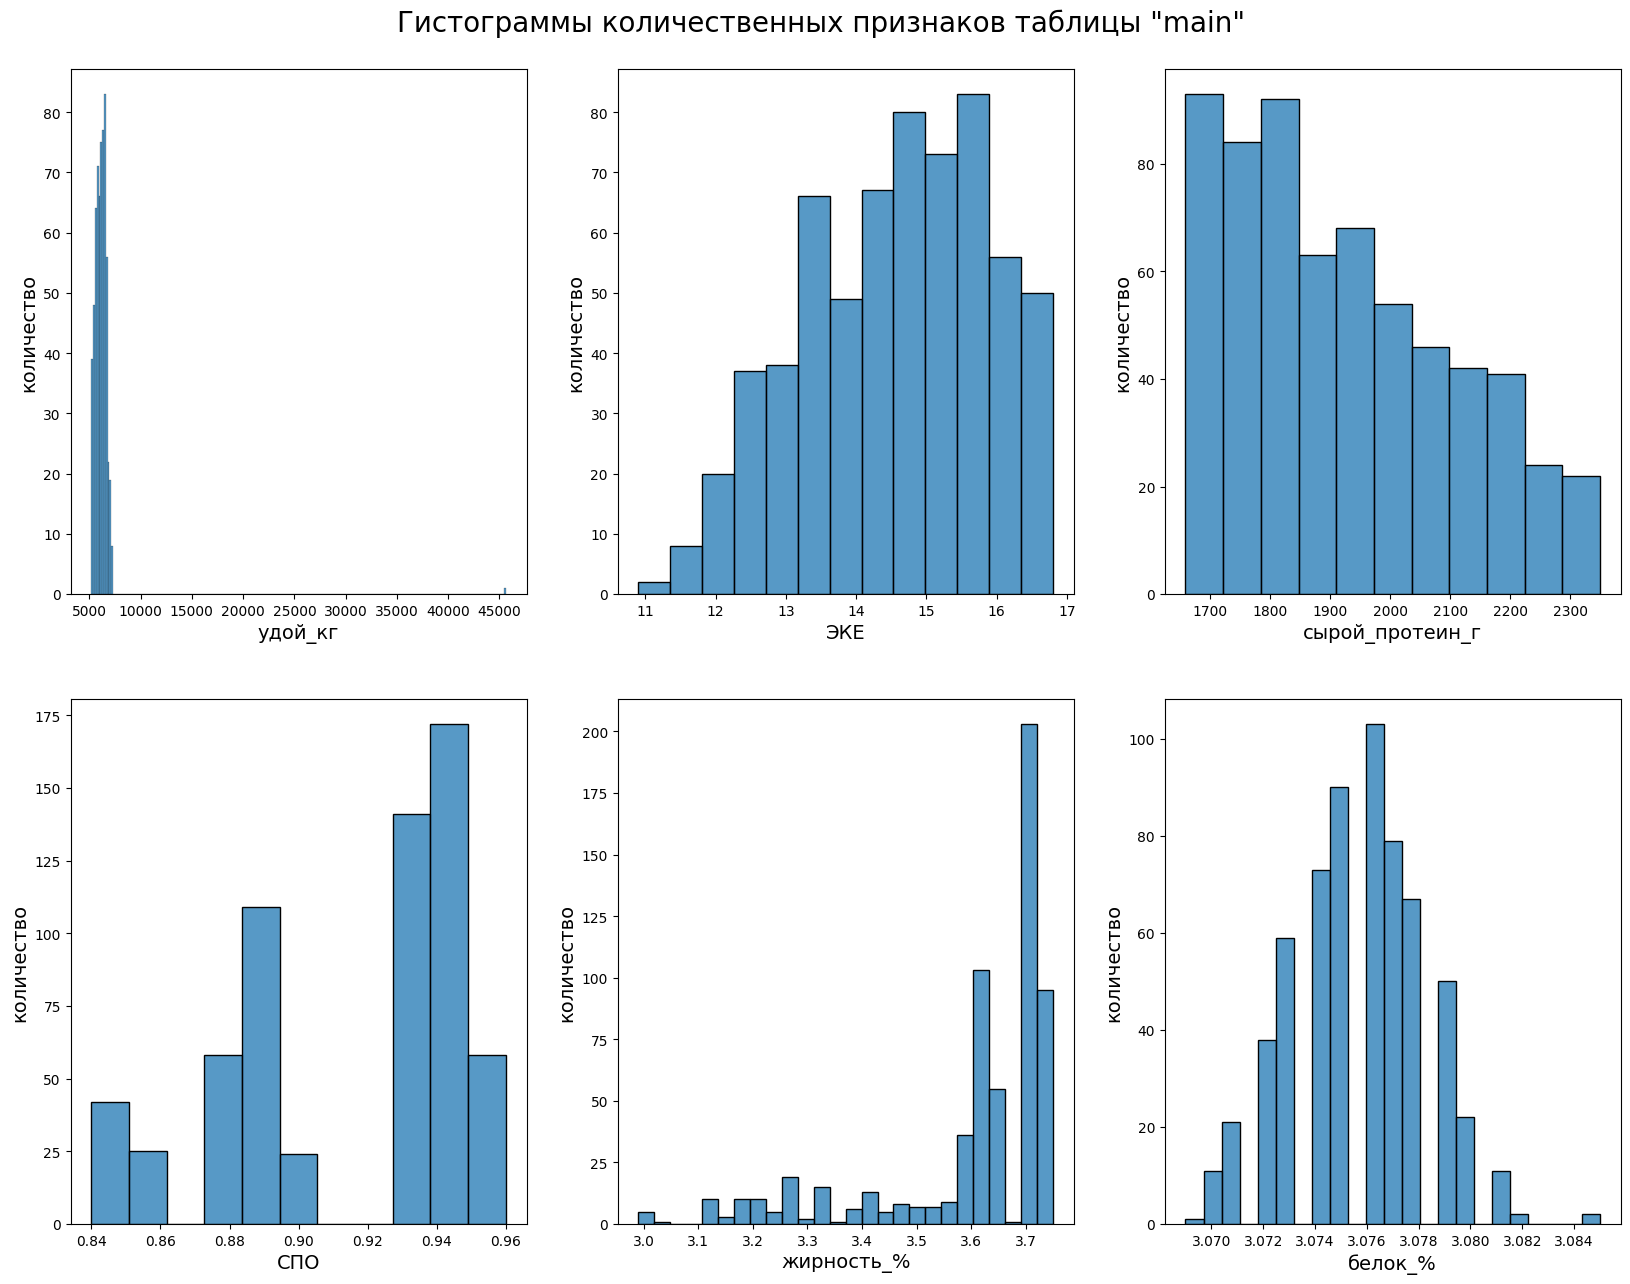

In [47]:
hist_plot(main)
plt.suptitle('Гистограммы количественных признаков таблицы "main"', fontsize=20, y=0.92)
plt.show()

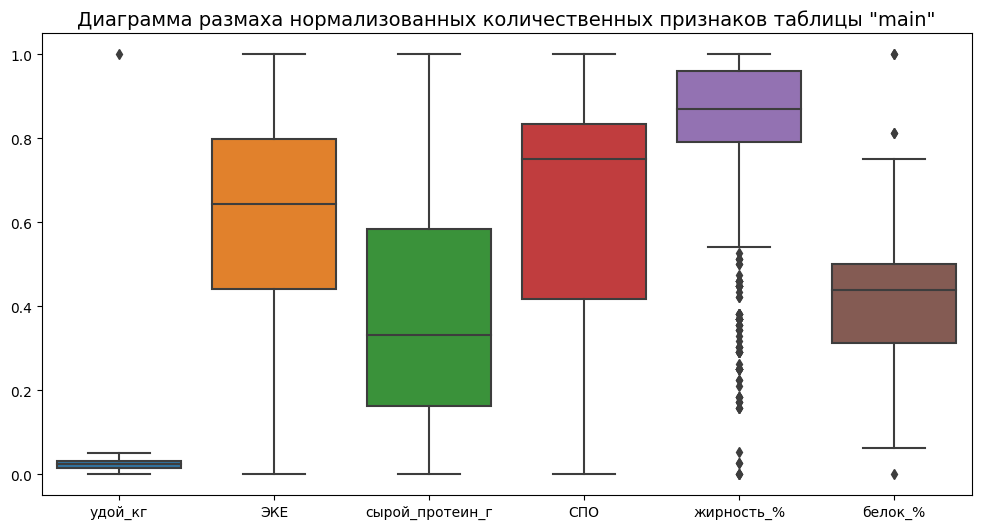

In [ ]:
main_num_columns = main.select_dtypes(include=['float64', 'int']).columns[1:]
main_num = main[main_num_columns].copy()

for clm in main_num.columns: # Нормализация
    main_num[clm] = (main_num[clm] - main_num[clm].min())/(main_num[clm].max() - main_num[clm].min())
    
plt.figure(figsize=(12, 6))
plt.title('Диаграмма размаха нормализованных количественных признаков таблицы "main"', fontsize=14)

sns.boxplot(data=main_num, orient='v')
plt.show()

Столбец `удой_кг` имеет аномальное значение - 45616 кг молока за год, медианное значение - 6133 кг. Данные столбца `СПО` и `жирность_%` имеют необычные распределения в три интервала, можно преобразовать их в категориальные признаки. Наблюдаются выбросы у столбцов `жирность_%` и `белок_%`.

In [ ]:
main.query('удой_кг < 7625', inplace=True)

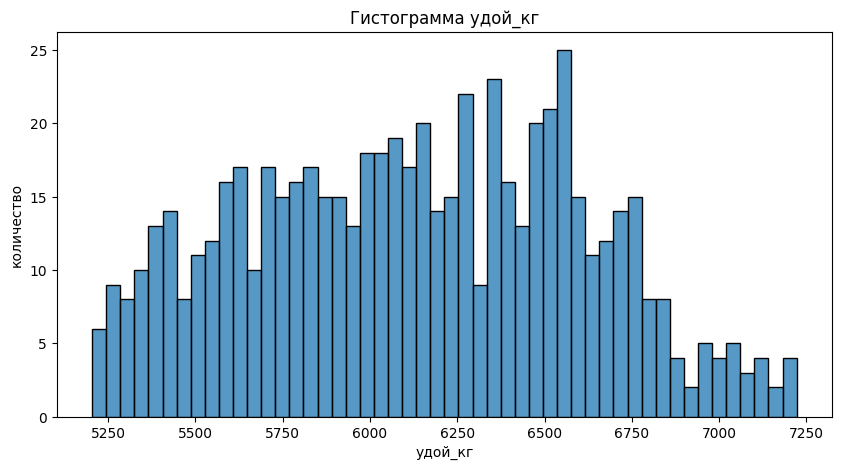

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(main['удой_кг'], bins=50)
plt.title('Гистограмма удой_кг')
plt.ylabel('количество')
plt.show()

Аномальное значение было удалено фильтром. Распределение удоя похоже на равномерное.

In [ ]:
main[main['жирность_%'] < 3.49]

id  удой_кг   ЭКЕ  сырой_протеин_г    СПО           порода тип_пастбища  \
3      4     5895  12.4             2012  0.885  РефлешнСоверинг    холмистое   
5      6     5254  12.7             1806  0.885  РефлешнСоверинг    холмистое   
6      7     5910  13.2             1792  0.885   Вис Бик Айдиал    равнинное   
9     10     5339  13.4             1791  0.895   Вис Бик Айдиал    холмистое   
10    11     5591  13.7             1678  0.895  РефлешнСоверинг    холмистое   
..   ...      ...   ...              ...    ...              ...          ...   
589  590     5213  12.1             2016  0.880  РефлешнСоверинг    равнинное   
591  592     5520  11.9             1785  0.880   Вис Бик Айдиал    равнинное   
602  603     5594  12.3             1742  0.880   Вис Бик Айдиал    равнинное   
614  615     5741  12.9             1749  0.880  РефлешнСоверинг    холмистое   
622  623     6357  14.2             1701  0.930  РефлешнСоверинг    холмистое   

    порода_папы_быка  жирность_%  белок_%  вкусное_молоко  более_2_лет  
3             Айдиал        3.40    3.075           False         True  
5            Соверин        3.13    3.078            True        False  
6            Соверин        3.48    3.077            True         True  
9            Соверин        3.13    3.075            True        False  
10            Айдиал        3.13    3.075            True        False  
..               ...         ...      ...             ...          ...  
589          Соверин        3.19    3.076           False        False  
591          Соверин        3.12    3.073           False        False  
602           Айдиал        3.11    3.077            True        False  
614           Айдиал        3.44    3.076            True         True  
622          Соверин        3.33    3.076           False         True  

[112 rows x 12 columns]

18% всех данных имеют выброс в виде малой жирности молока. Нет необходимости в удалении выбросов столбца `жирность_%`.

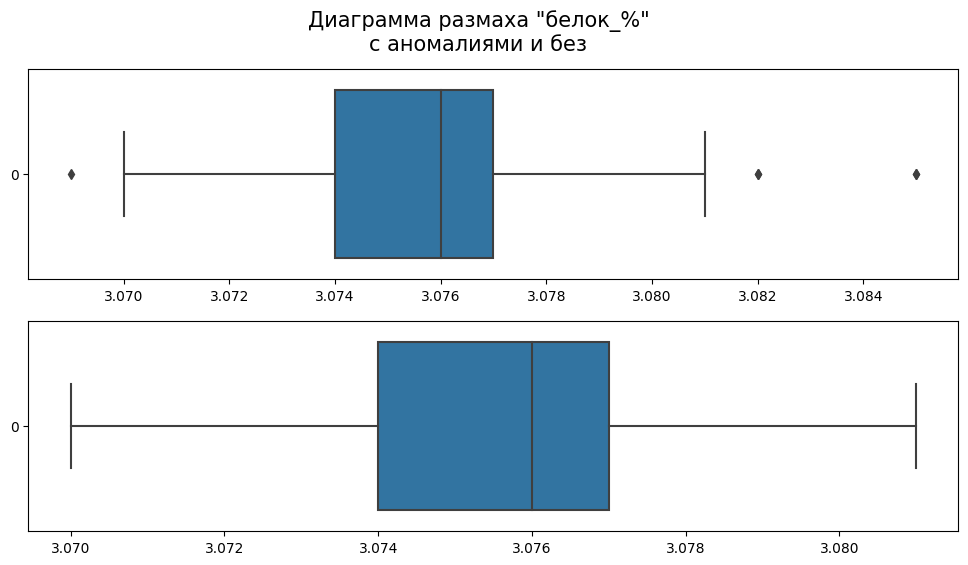

In [ ]:
plt.figure(figsize=(12, 6))
plt.suptitle('Диаграмма размаха "белок_%"\nс аномалиями и без', fontsize=15)

plt.subplot(2,1,1)
sns.boxplot(data=main['белок_%'], orient='h')
main = main[(3.07 <= main['белок_%']) & (main['белок_%'] <= 3.081)]

plt.subplot(2,1,2)
sns.boxplot(data=main['белок_%'], orient='h')

plt.show()

5 строк имеют выброс в содержании белков в молоке (`белок_%`). Такие выбросы стоит удалять из датасета, они могут исказить статистические свойства данных.

In [ ]:
main_category_columns = main.select_dtypes(include=['category', 'bool']).columns

main[main_category_columns].describe()

порода тип_пастбища порода_папы_быка вкусное_молоко  \
count              623          623              623            623   
unique               2            2                2              2   
top     Вис Бик Айдиал    холмистое           Айдиал           True   
freq               368          348              314            366   

       более_2_лет  
count          623  
unique           2  
top           True  
freq           514

In [ ]:
lst_palette = ['Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu',\
               'CMRmap', 'RdGy', 'gist_ncar', 'gist_heat', 'tab20']

def category_countplot(df, category_columns):
    total = df[category_columns].shape

    plt.figure(figsize=(18, 10))
    plt.suptitle('Графики категориальных признаков', fontsize=14, y=0.92)

    for i, n in enumerate(lst_palette[:total[1]]):
        plt.subplot(2, 3, i+1)
        ax = sns.countplot(x=df[category_columns].columns[i], data=df,  palette=n)

        for p in ax.patches:
            height = p.get_height()
            
            ax.text(x=p.get_x() + p.get_width() / 2,
                    y=height/2,
                    s=f'{height/total[0]*100:.0f}%',
                    ha="center",
                    size='x-large')

        plt.ylabel('количество вхождений')

    plt.show()

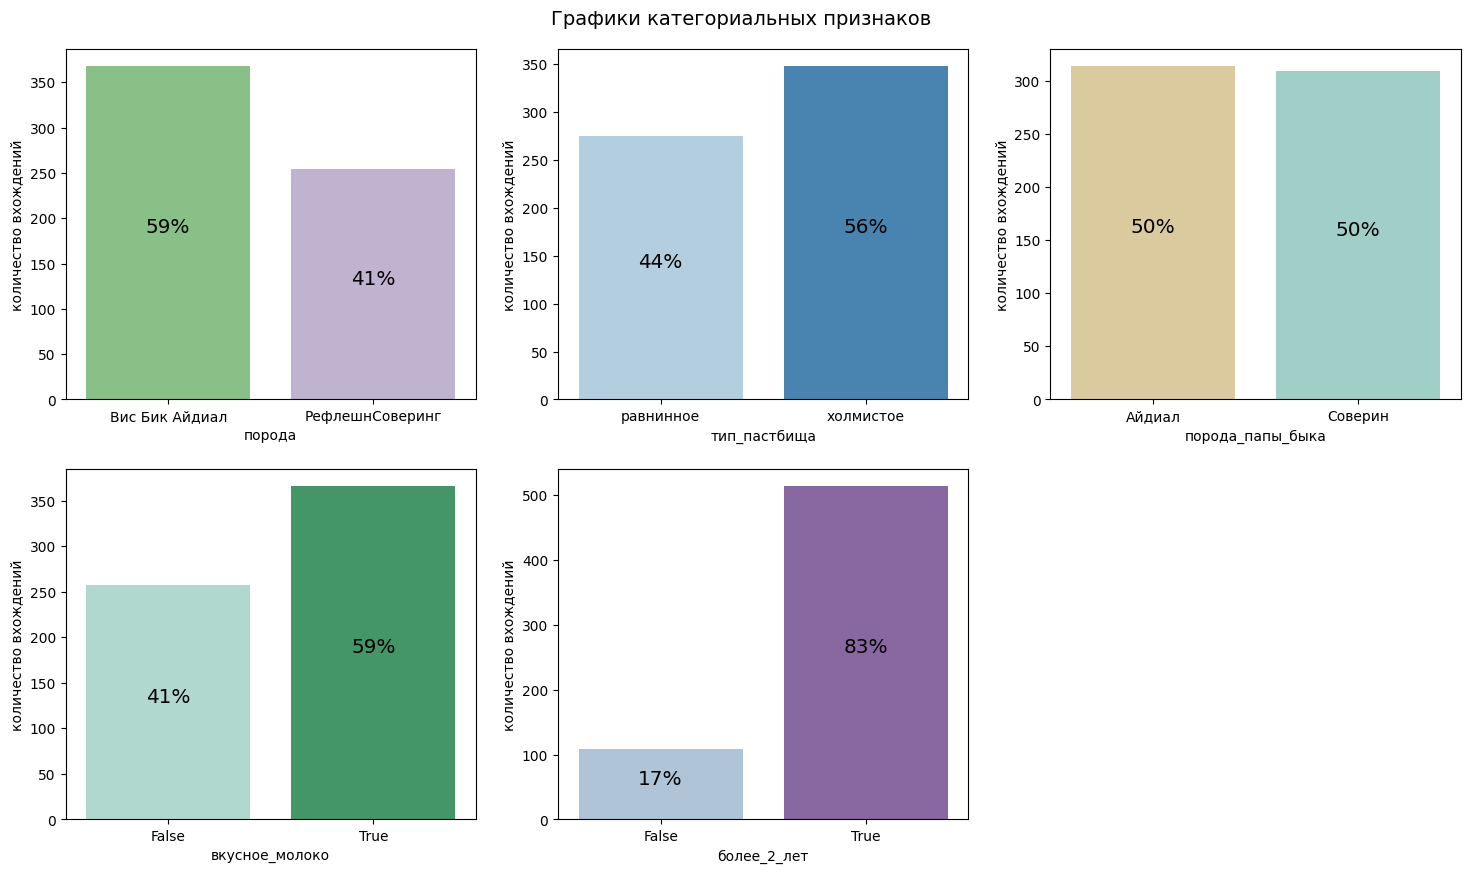

In [ ]:
category_countplot(main, main_category_columns)

Все категориальные данные имеют бинарный признак. Чаще всего буренка старше 2 лет - в 83% наблюдений. В остальных признаках данные распределены в примерно в равных долях со значениями:`Порода_папы_быка` - Айдиал (50%), `вкусное_молоко` - True (59%), `тип_пастбища` - Холмистое (56%), `порода` - Вис Бик Айдиал (60%).

### С какими признаками связан малый и большой удой?

In [ ]:
def countplot_ticks(clm, bins, hue, palette=None):
    intervals = pd.cut(main[clm], bins=bins).sort_values()
    inter = [int(i.right) for i in intervals.unique()]

    sns.countplot(x=intervals, hue=main[hue], palette=palette)
    plt.ylabel('Количество вхождений')
    plt.xticks(ticks=[*range(bins)], labels=inter)


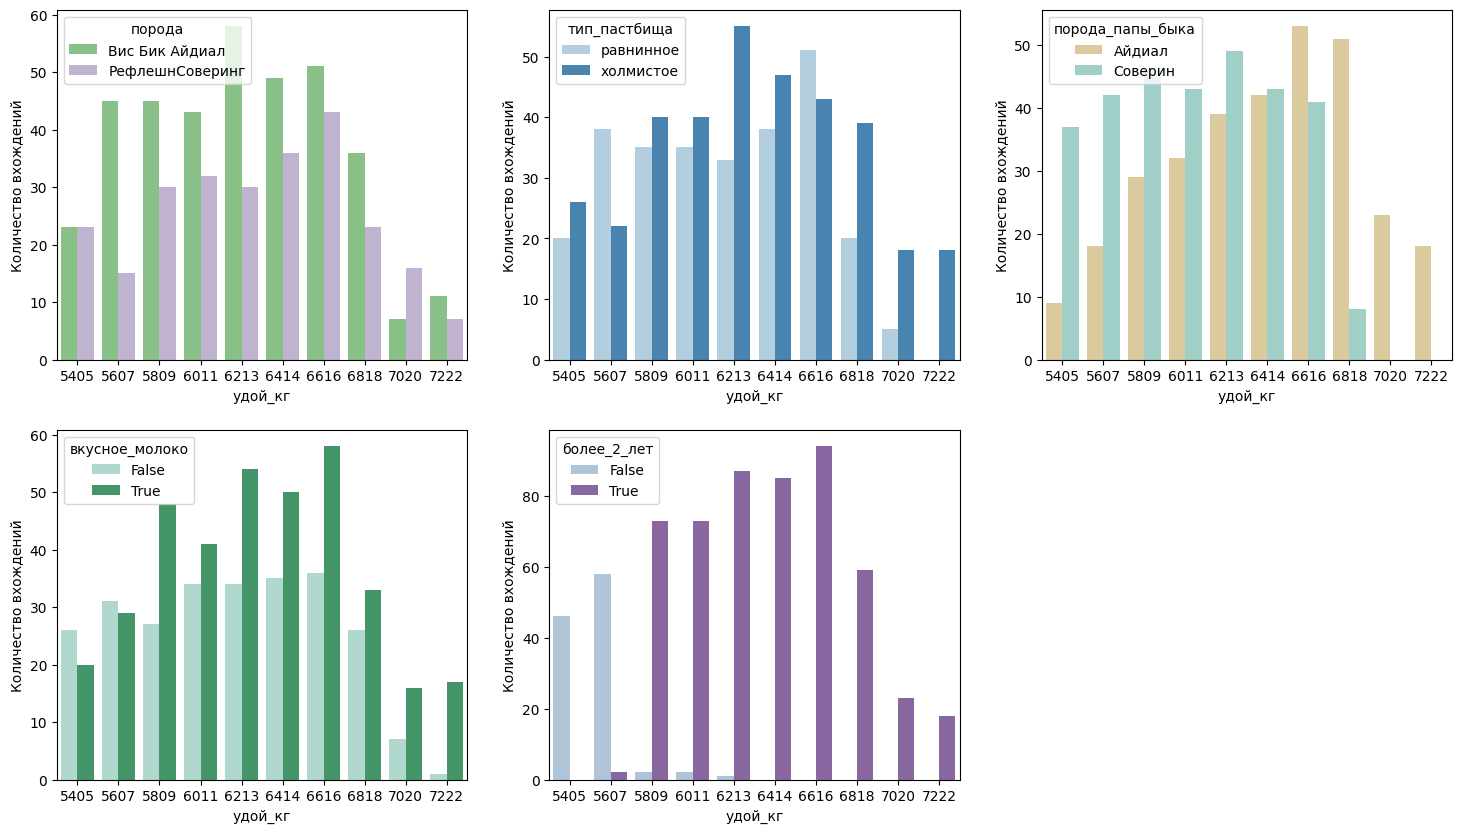

In [ ]:
plt.figure(figsize=(18, 10))

for i, hue in enumerate(main_category_columns):
    plt.subplot(2, 3, i+1)
    countplot_ticks('удой_кг', 10, hue, lst_palette[i])
    

- Коровы с холмистым типом пастбища достигают максимального удоя за год.
- Коровы с породой папы быка Айдиал имеют больший удой за год. 
- Молодые коровы несут меньше молока в год, чем зрелые.

### Количественные и категориальные признаки таблицы cow_buy

In [ ]:
round(cow_buy.describe(), 3)

текущая_жирность_%  текущий_белок_%
count              20.000           20.000
mean                3.577            3.070
std                 0.127            0.010
min                 3.340            3.046
25%                 3.510            3.064
50%                 3.590            3.074
75%                 3.650            3.076
max                 3.770            3.081

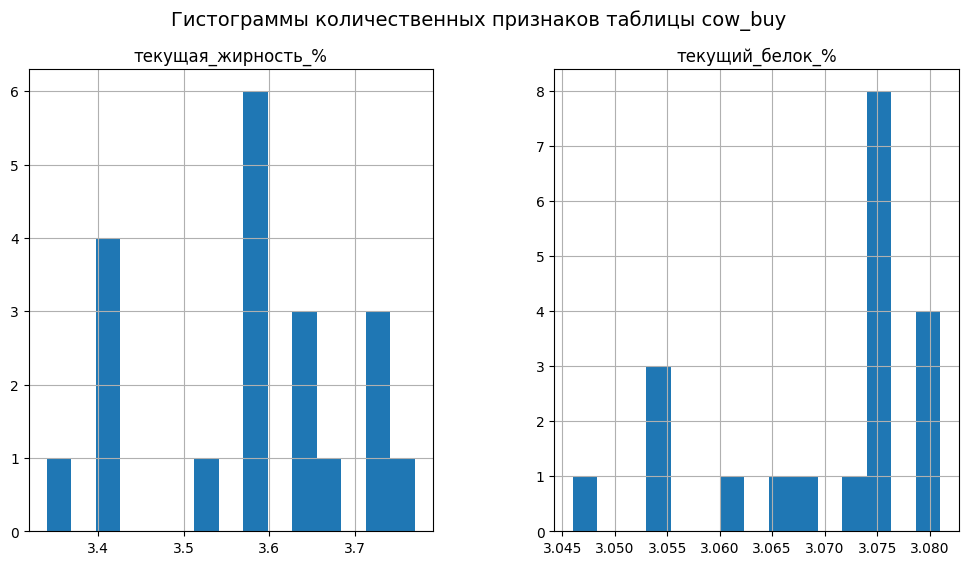

In [ ]:
cow_buy.hist(bins=15, figsize=(12, 6))
plt.suptitle('Гистограммы количественных признаков таблицы cow_buy', fontsize=14)
plt.show()

Аномальные значения отсутствуют. Медианное значение столбца `текущая_жирность_%` равна 3.59, `текущий_белок_%` - 3.074.

In [ ]:
cow_buy_category_columns = cow_buy.select_dtypes(['category', 'bool']).columns

cow_buy[cow_buy_category_columns].describe()

порода тип_пастбища порода_папы_быка имя_папы более_2_лет
count                20           20               20       20          20
unique                2            2                2        4           2
top     РефлешнСоверинг    равнинное          Соверин   Буйный        True
freq                 11           11               12        8          15

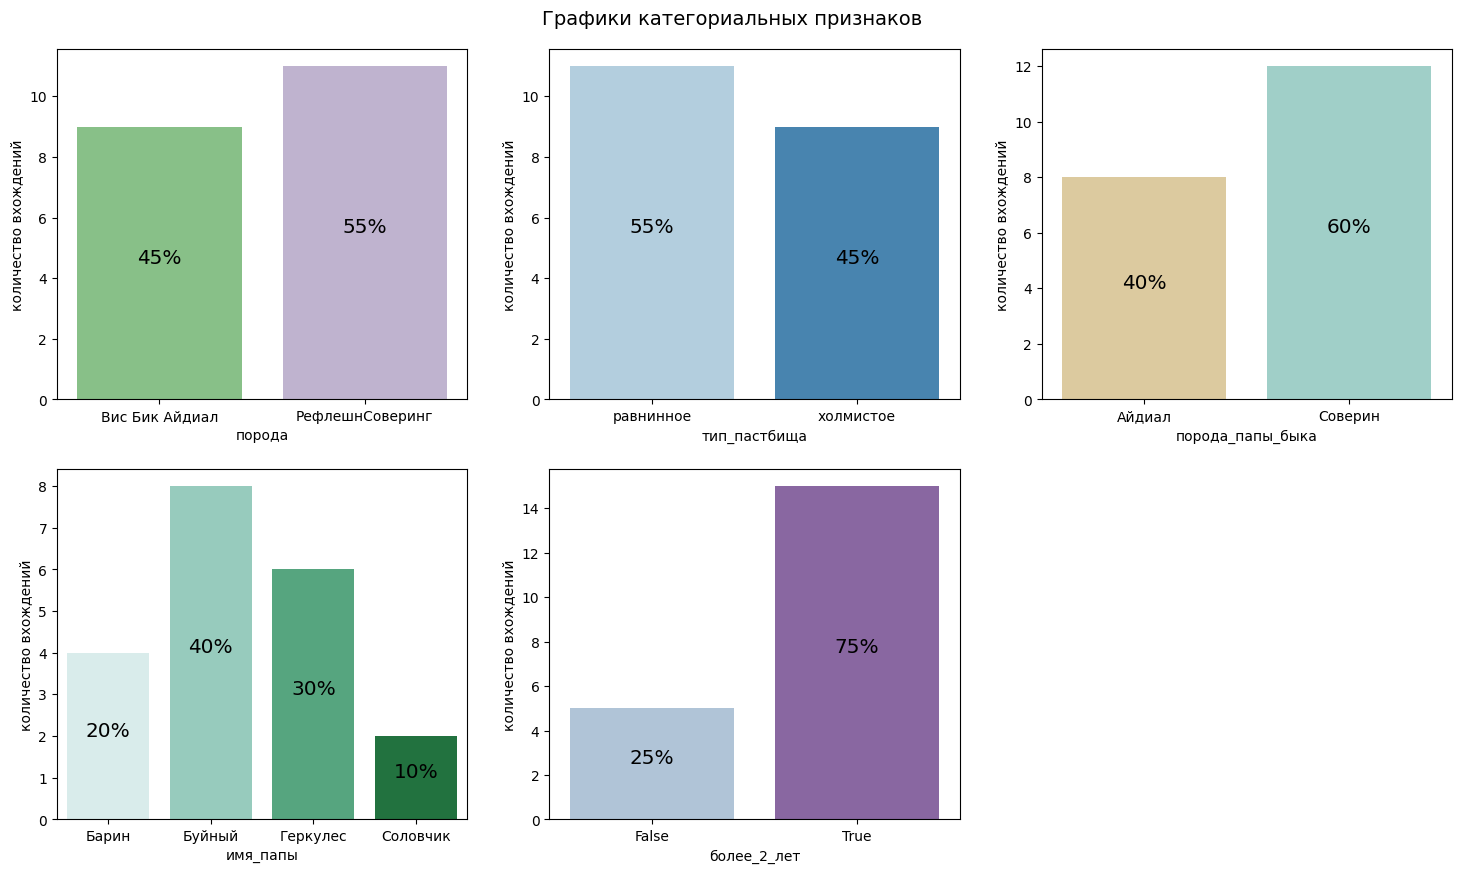

In [ ]:
category_countplot(cow_buy, cow_buy_category_columns)

Все категориальные столбцы, кроме `имя_папы` имеют бинарный признак. В датасете всего 16 строк, недостаточно данных для проведения анализа.

### Вывод исследовательского анализа данных


1. Датасет **`main`**:
    - Аномальные значения столбцов `удой_кг` и `белок_%` были удалены фильтром
    - Выбросы столбца `жирность_%` было решено оставить
    - Все категориальные столбцы имеют бинарный признак
    - Корова старше 2 лет в 83% наблюдений
    - Коровы с холмистым типом пастбища достигают максимального удоя за год
    - Корова с породой папы быка "Айдиал" имеет больший удой за год
    - Молодые коровы несут меньше молока в год, чем зрелые


2. Датасет **`cow_buy`**:
    - Аномальные значения отсутствуют
    - Все категориальные столбцы, кроме `имя_папы` имеют бинарный признак

## Корреляционный анализ

### Взаимосвязь между признаками

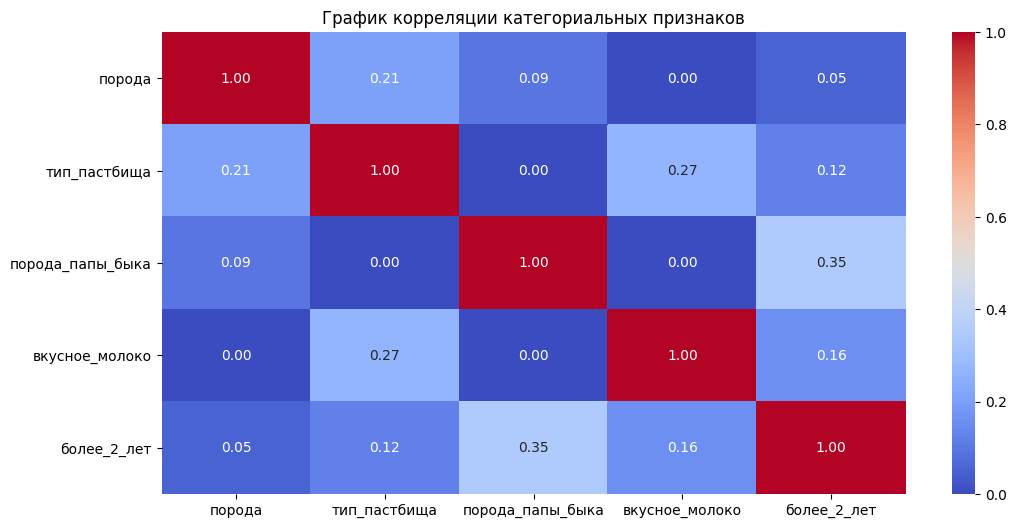

In [ ]:
cat_col_main = main.select_dtypes(include=['category', 'bool']).columns

# Построение heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(main[cat_col_main].phik_matrix(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('График корреляции категориальных признаков')
plt.show()

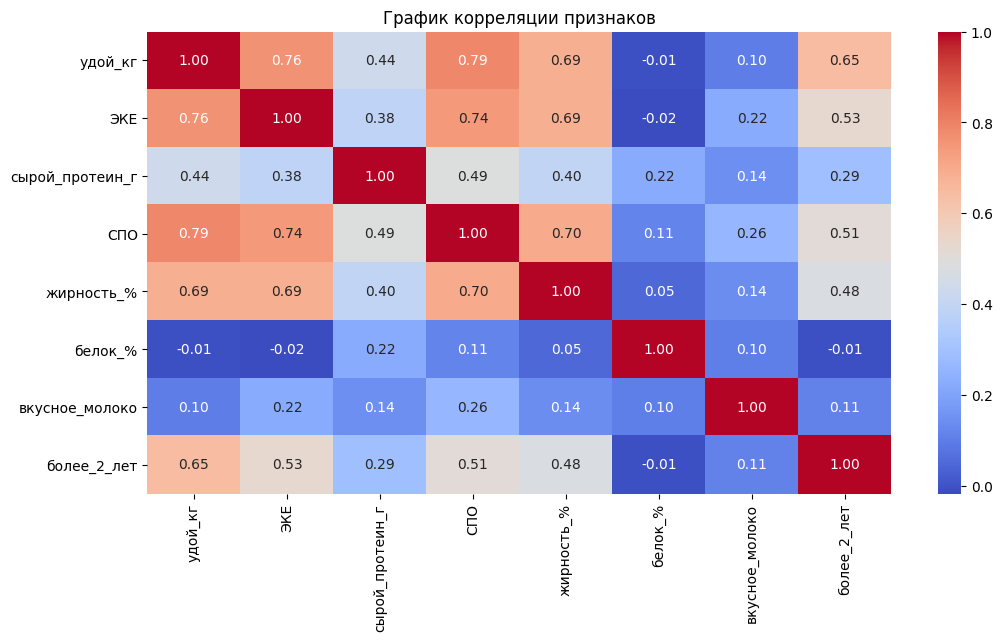

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(main.iloc[:, 1:].corr('spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('График корреляции признаков')
plt.show()

1. Связь входных признаков с целевыми:
    - Целевой столбец задачи регрессии `удой_кг` имеет высокую связь с значениями: `СПО`(0.79), `ЭКЕ`(0.76) и заметную с значениями: `более_2_лет`(0.65), `жирность_%`(0.69). 
    - Целевой столбец задачи классификации `вкусное_молоко` имеет со всеми входными признаками слабую связь.


2. Мультиколлинеарность входных признаков:
    - `ЭКЕ`имеет высокую связь с `СПО` - 0.74, заметную с `жирность_%` - 0.69
    - `СПО` имеет заметную связь с `жирность_%` - 0.70

###  Диаграммы рассеяния для признака удой_кг и всех количественных признаков

In [ ]:
# критерий Пирсона между целевым и входным при категориальном признаке
def get_label_corr(num_col, cat_col, signs, target='удой_кг'):
    label = []
    
    if 'True' in signs:
        signs = list(map(eval, signs)) # преобразование в bool
    
    for sign in signs:
        df_sign = main.query(f'{cat_col} == @sign')
        label.append(f'{sign}: {round(df_sign[target].corr(df_sign[num_col]), 2)}')
        
    return label


# диаграмма рассеяния для целевого и количественного со всеми категориальными
def scatterplot_num_category(num_col, target='удой_кг'):
    plt.figure(figsize=(25, 10))
    plt.suptitle(f'Диаграмма рассеяния удой_кг и {num_col}', fontsize=20, y=0.92)
    
    k = 1
    
    for cat_col in main_category_columns:
        plt.subplot(2, 3, k)     
        
        scatter = sns.scatterplot(data=main, x=num_col, y=target, hue=cat_col)
        handles, labels = scatter.get_legend_handles_labels() # labels: list, содержащий str
        
        plt.legend(title=cat_col, handles=handles, fontsize=12, labels=get_label_corr(num_col, cat_col, labels))
        k += 1
        

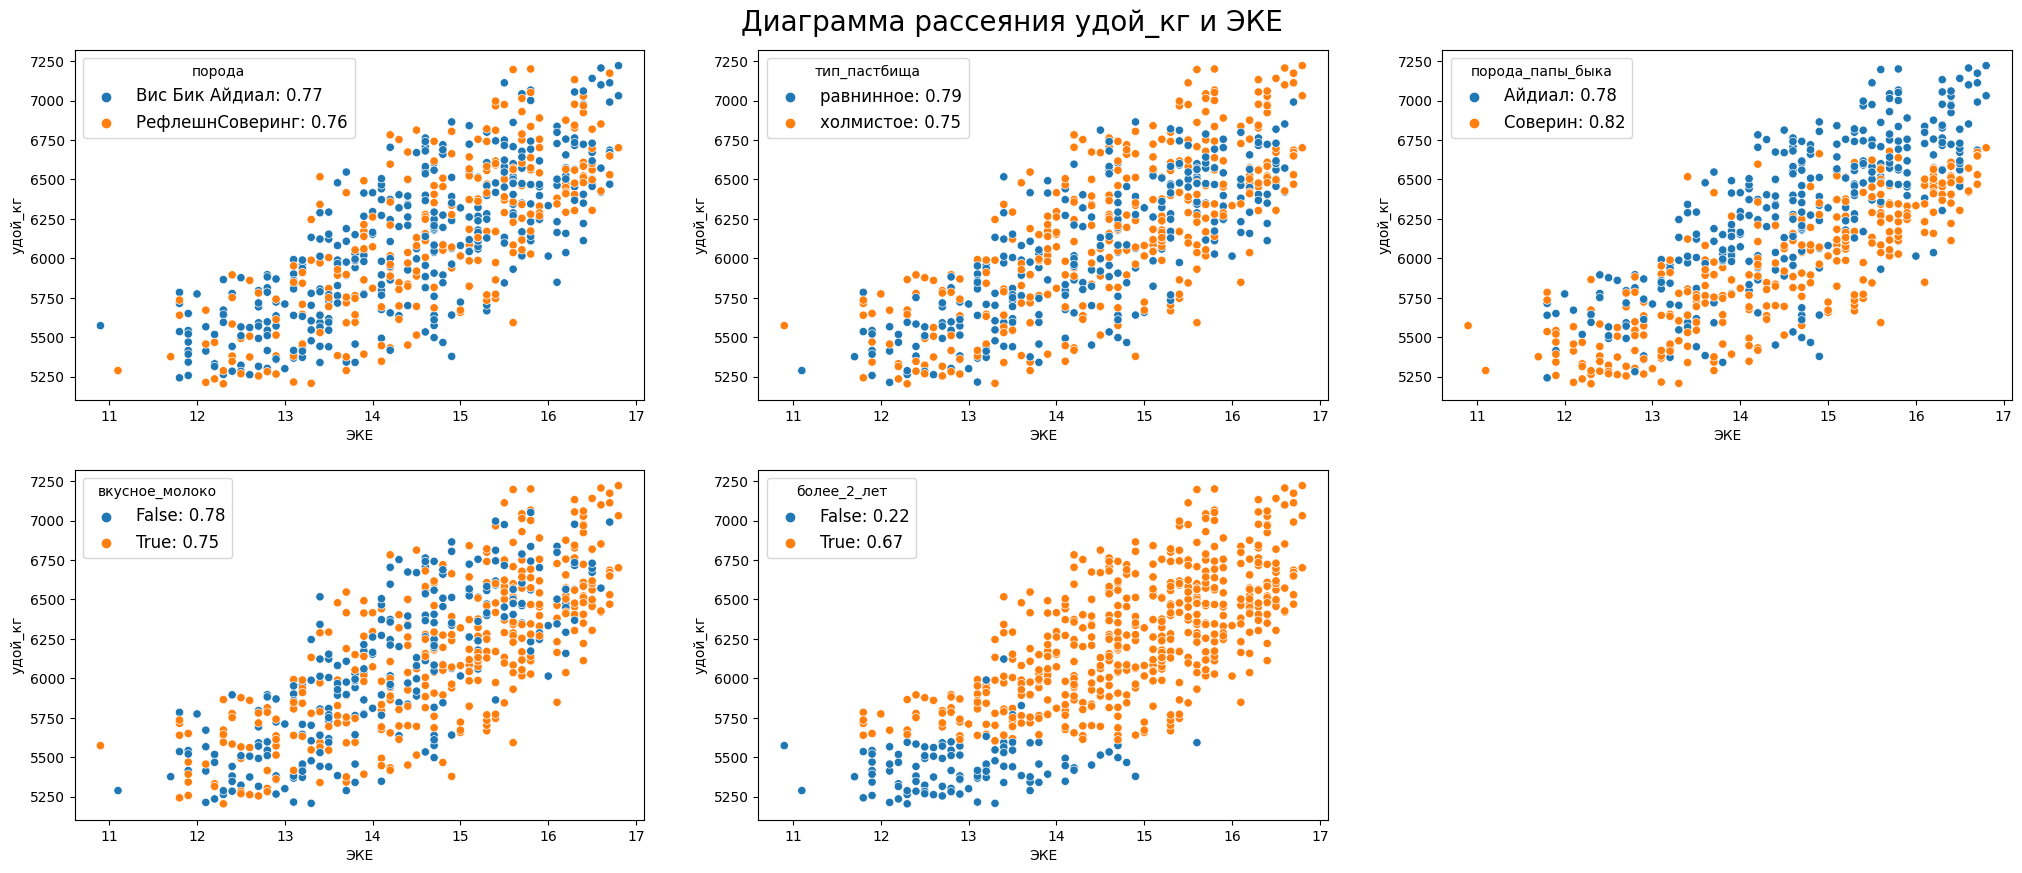

In [ ]:
scatterplot_num_category('ЭКЕ')

Наблюдается нелинейная положительная связь между признаками `ЭКЕ` и `удой_кг`.

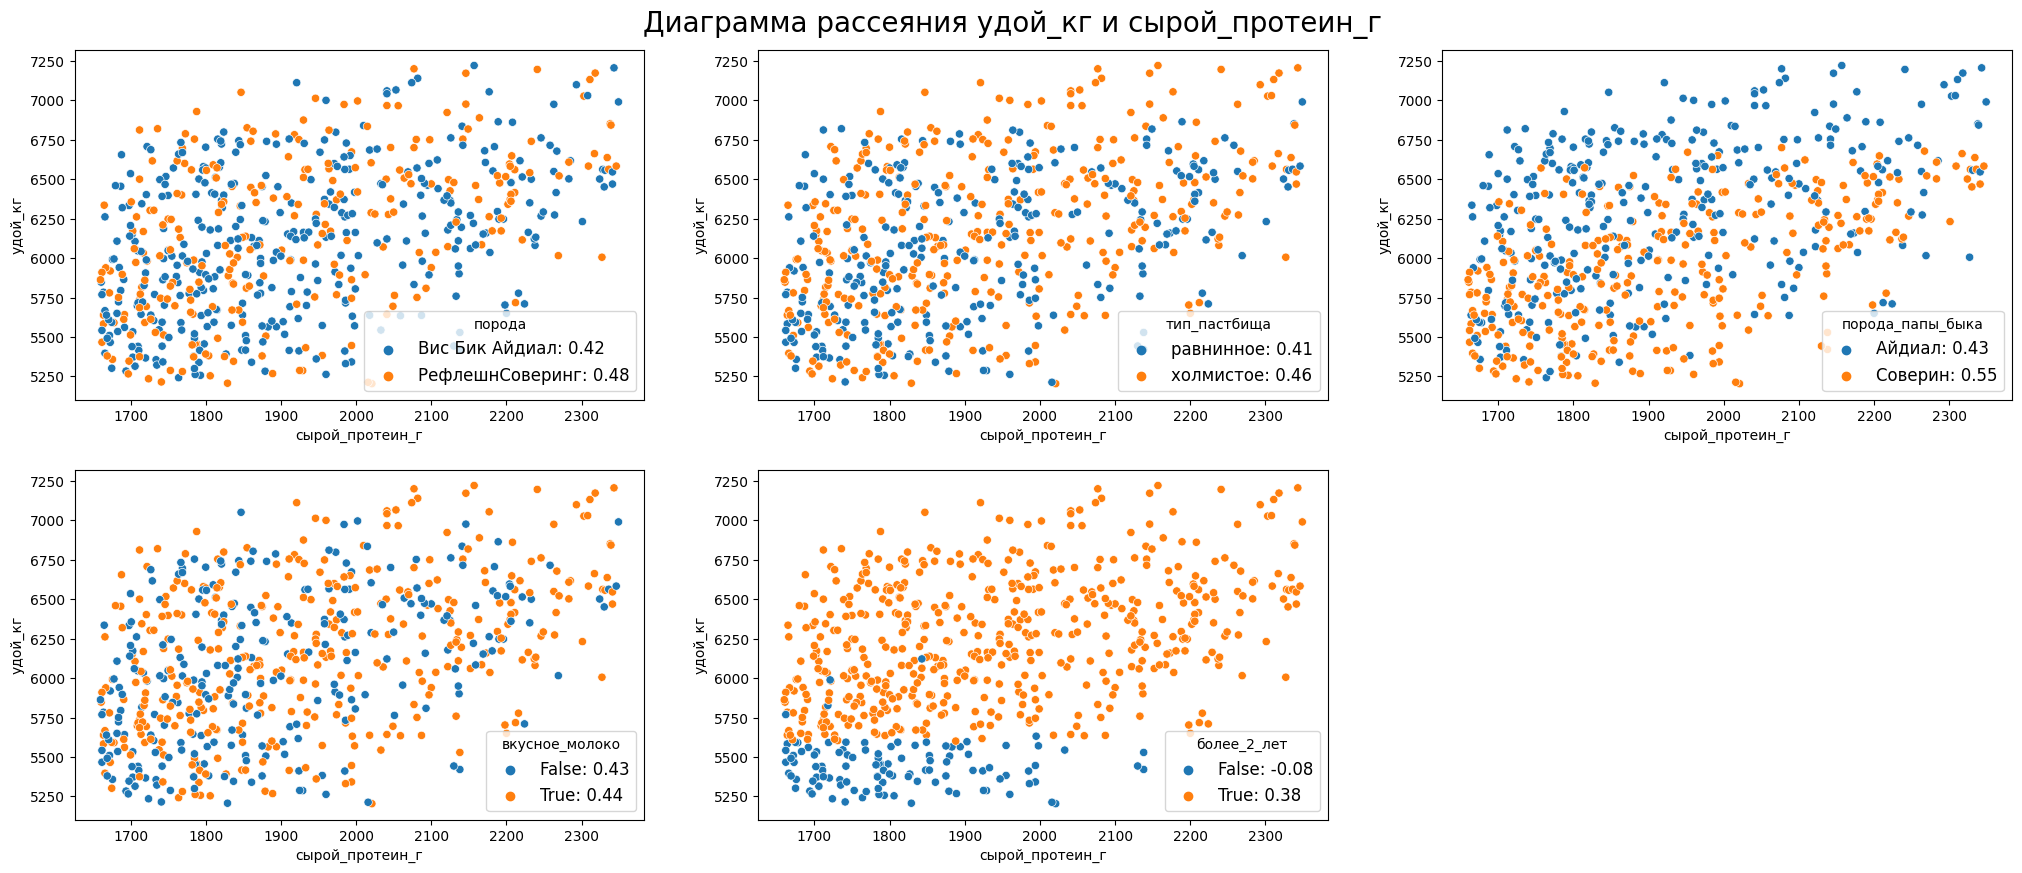

In [ ]:
scatterplot_num_category('сырой_протеин_г')

Наблюдается слабая положительная связь между признаками `сырой_протеин_г` и `удой_кг`.

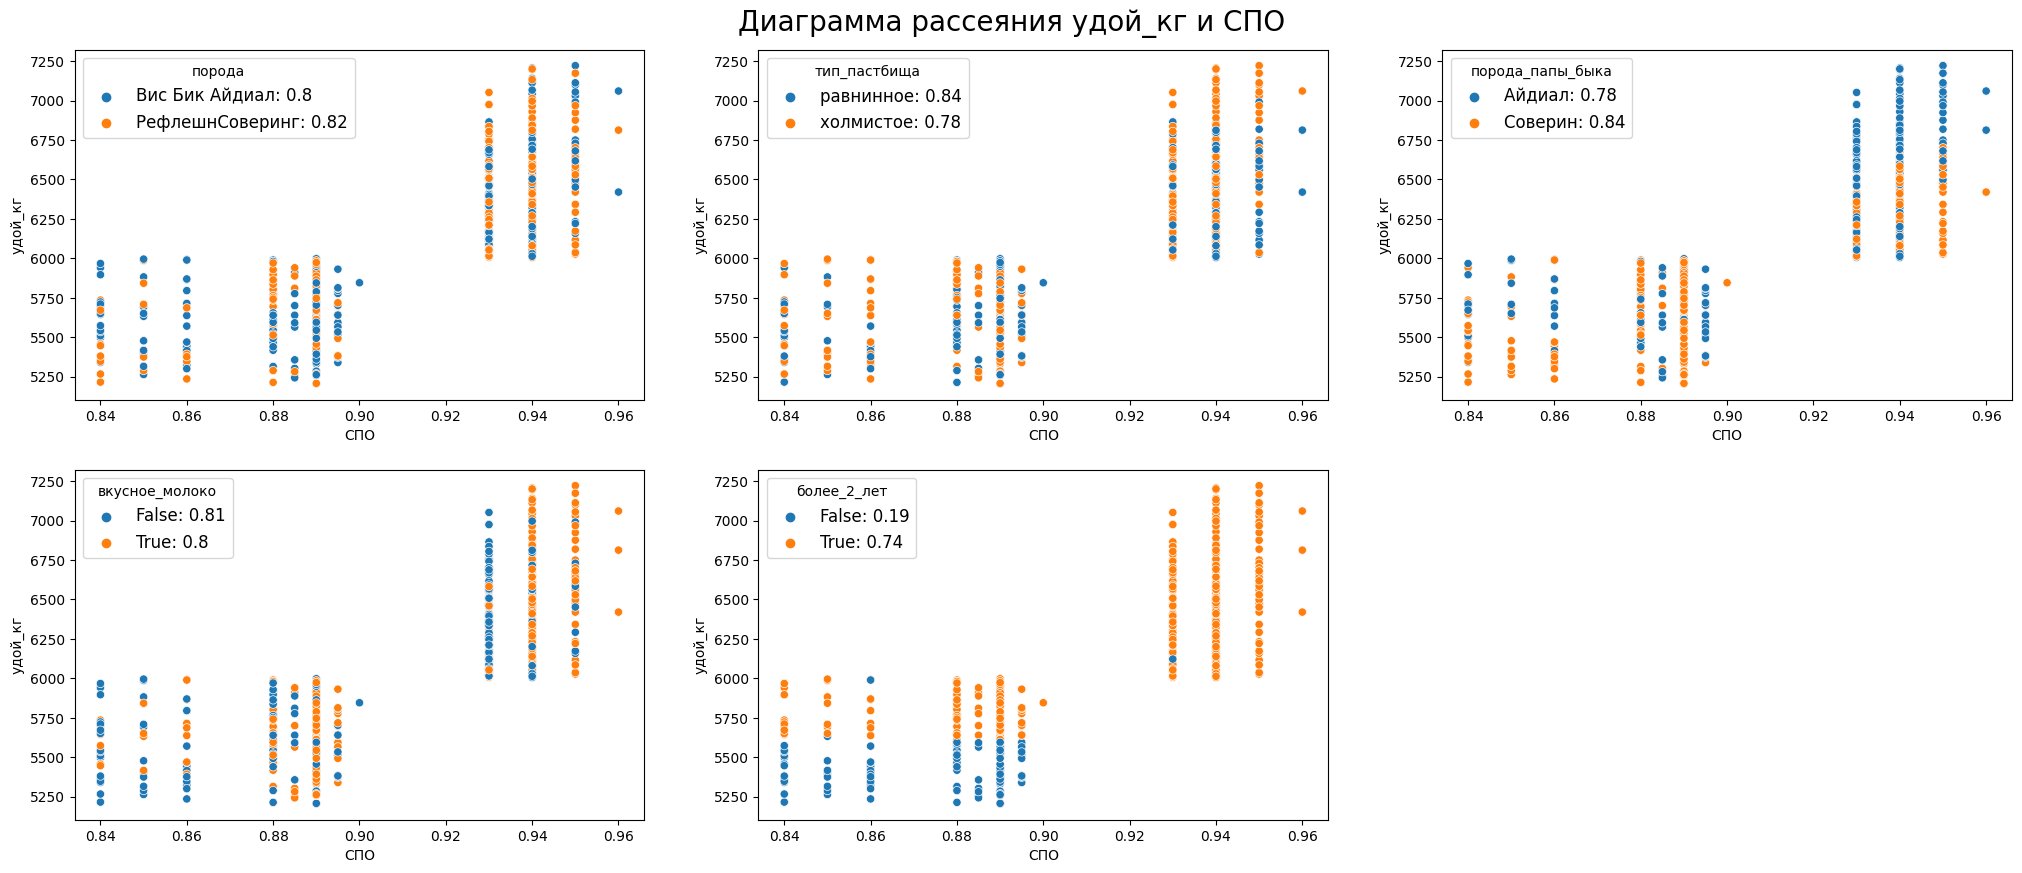

In [ ]:
scatterplot_num_category('СПО')

Наблюдается нелинейная положительная связь между признаками `СПО` и `удой_кг`.

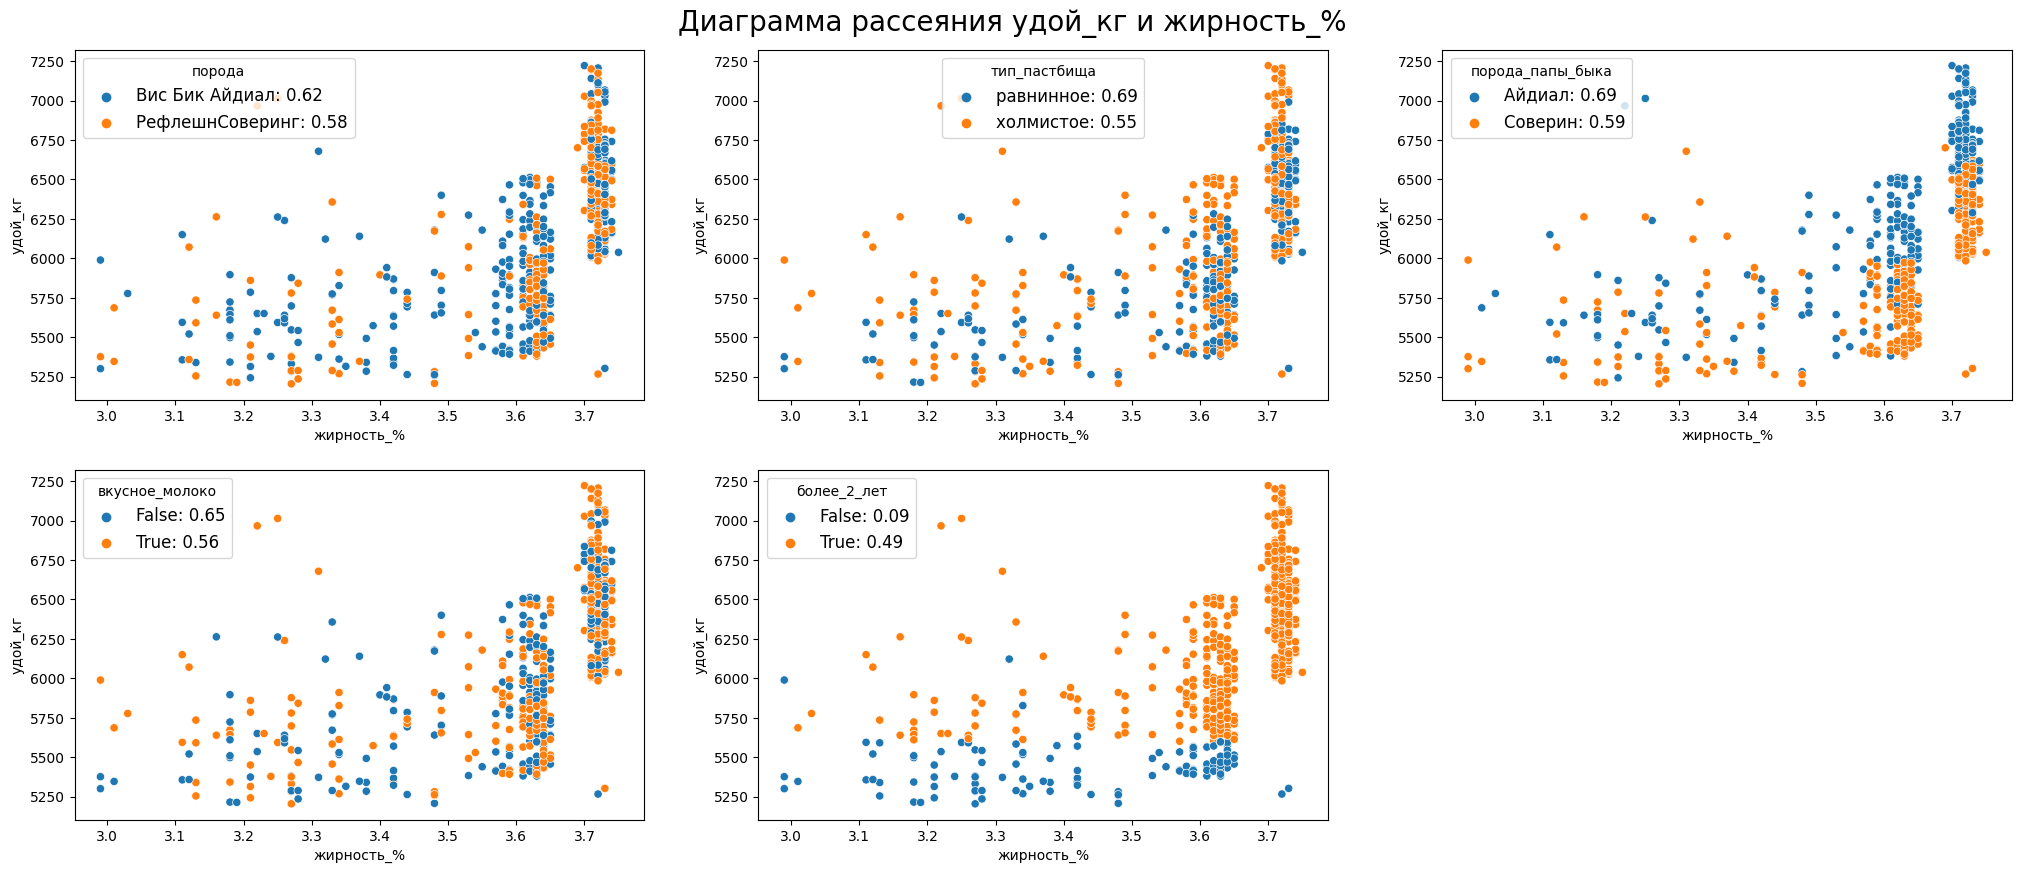

In [ ]:
scatterplot_num_category('жирность_%')

Наблюдается нелинейная умеренная положительная связь между признаками `жирность_%` и `удой_кг`.

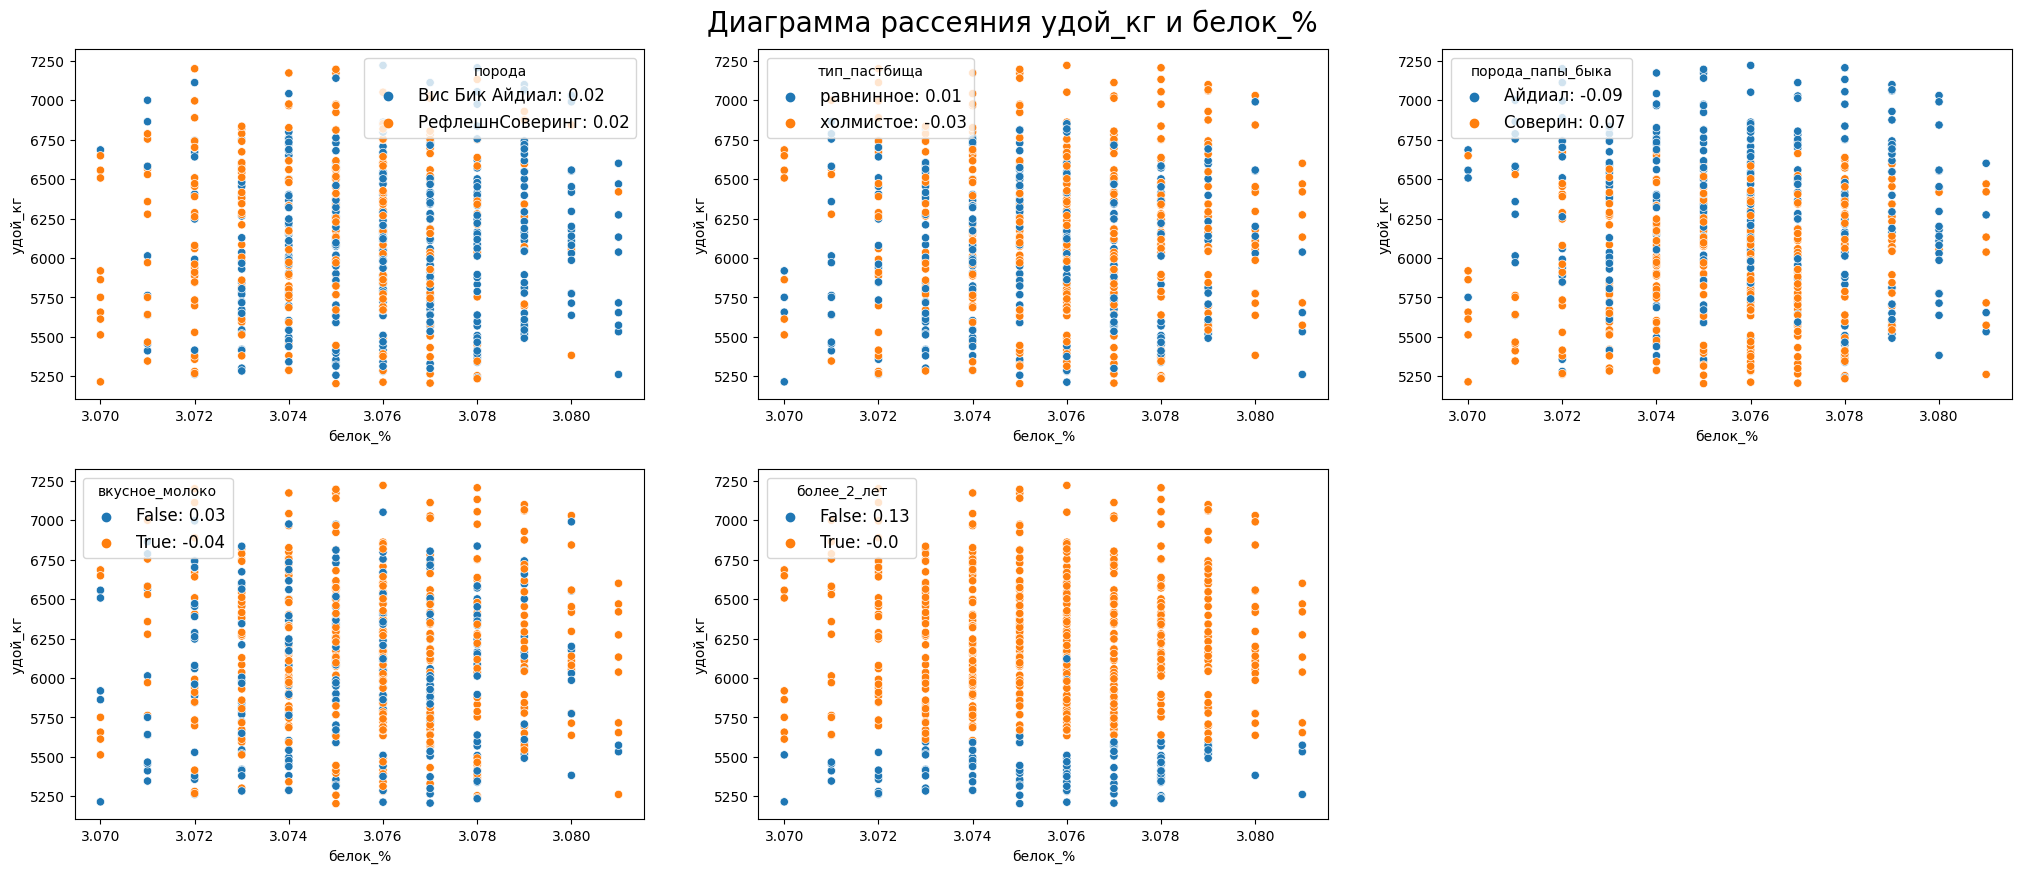

In [ ]:
scatterplot_num_category('белок_%')

Наблюдается отсутствие связи между признаками `белок_%` и `удой_кг`.

### Вывод корреляционного анализа

- Связь признаков с целевыми переменными:
    - Для задачи регрессии (`удой_кг`):
        - Высокая связь с `СПО` (0.79) и `ЭКЕ` (0.76).
        - Заметная связь с `более_2_лет` (0.65) и `жирность_%` (0.69).
    - Для задачи классификации (`вкусное_молоко`):
        - Слабая связь со всеми признаками.


- Типы взаимосвязи между `удой_кг` и всеми входными количественными признаками:
    - Прямая положительная связь с `ЭКЕ`
    - Слабая положительная связь с `сырой_протеин_г`
    - Нелинейная положительная связь с `СПО`
    - Нелинейная умеренная положительная связь с `жирность_%`
    - Отсутствие связи с `белок_%`


- Мультиколлинеарность:
    - Высокая связь между `ЭКЕ` и `СПО` (0.74).
    - Заметная связь между `ЭКЕ` и `жирность_%` (0.69), а также между `СПО` и `жирность_%` (0.70).
    
    
При значении 'False' категориального признака `более_2_лет`, `удой_кг` не имеет корреляцию со всеми количественными признаками.

## Обучение модели линейной регрессии

### Подготовка данных и обучение на них первой модели

In [ ]:
# Прямое кодирование категориальных тренировочных и тестовых
def encoder_category(X_train, X_test, cat_col):
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

    X_train_ohe = encoder.fit_transform(X_train[cat_col])
    X_test_ohe = encoder.transform(X_test[cat_col])

    encoder_col_names = encoder.get_feature_names_out()

    X_train_ohe = pd.DataFrame(data=X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(data=X_test_ohe, columns=encoder_col_names)
    
    return X_train_ohe, X_test_ohe, encoder

In [ ]:
# Стандартизация количественных тренировочных и тестовых
def standard_num(X_train, X_test, num_col):
    scaler = StandardScaler()
    
    X_train_scaled = scaler.fit_transform(X_train[num_col])
    X_test_scaled = scaler.transform(X_test[num_col])
    
    X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=num_col)
    X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=num_col)
    
    return X_train_scaled, X_test_scaled, scaler

In [ ]:
# Графики остатков
def residuals_plot(predictions, residuals):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True)
    plt.title('Гистограмма распределения остатков')
    plt.ylabel('остатки')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=predictions, y=residuals)
    sns.regplot(x=predictions, y=residuals, order=2)
    plt.title('Анализ дисперсии')
    plt.xlabel('предсказание')
    plt.ylabel('остатки')

    plt.show()

In [ ]:
# Функция для предсказания удоя датасета main
def linear_regression(cat_col, num_col):
    RANDOM_STATE = 42

    X = main.drop(['id', 'удой_кг'], axis=1)
    y = main['удой_кг']

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

    X_train_ohe, X_test_ohe, encoder = encoder_category(X_train, X_test, cat_col)
    X_train_scaled, X_test_scaled, scaler = standard_num(X_train, X_test, num_col)

    X_train = pd.concat([X_train_scaled, X_train_ohe], axis=1)
    X_test = pd.concat([X_test_scaled, X_test_ohe], axis=1)

    # Обучение модели линейной регрессии
    model_lr = LinearRegression()

    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    # Анализ остатков
    residuals = y_test - predictions
    residuals_plot(predictions, residuals)

    rmse = mean_squared_error(y_test, predictions)**0.5
    mae = mean_absolute_error(y_test, predictions)

    print('MAE:', round(mae ,2))
    print('RMSE:', round(rmse, 2))
    print('R2:', round(r2_score(y_test, predictions), 3))
    
    print('Доверительный интервал:', (round(residuals.quantile(0.025), 2), round(residuals.quantile(0.975), 2)))
    
    return encoder, scaler, model_lr

Отбор признаков:
1. `ЭКЕ`
2. `сырой_протеин_г`
3. `более_2_лет`
4. `тип_пастбища`
5. `порода`
6. `порода_папы_быка`

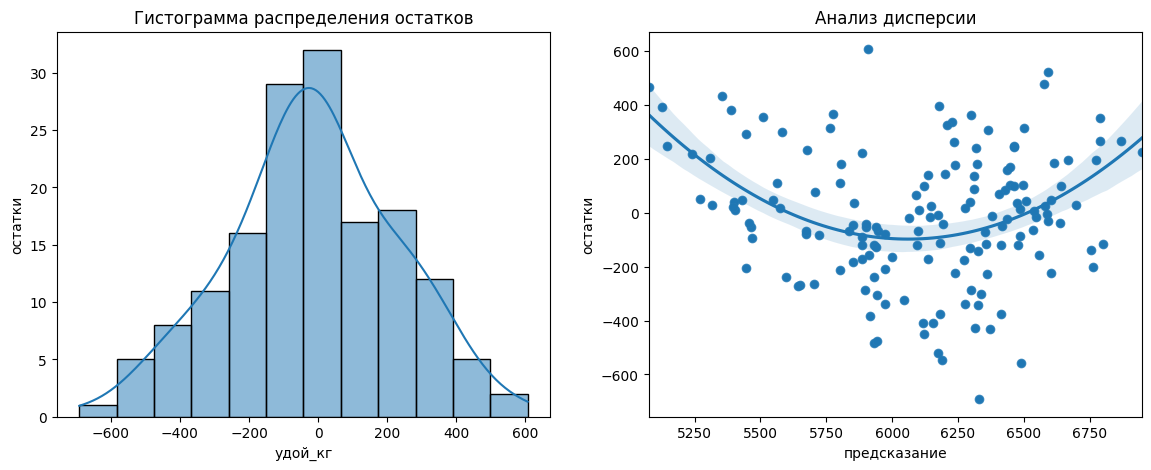

MAE: 190.36
RMSE: 242.2
R2: 0.732
Доверительный интервал: (-487.88, 435.9)


In [ ]:
cat_col_0 = ['более_2_лет', 'тип_пастбища', 'порода', 'порода_папы_быка']
num_col_0 = ['ЭКЕ', 'сырой_протеин_г']

encoder_0, scaler_0, model_lr_0 = linear_regression(cat_col_0, num_col_0)

В 73% случаев предсказание модели ближе к истине, чем среднее значение целевого признака. Анализ остатков непостоянный, модель завышает прогнозные значения. Есть необходимость в проведение дополнительного исследования, с трансформацей или добавлением входного признака.

### Подготовка данных и обучение на них второй модели

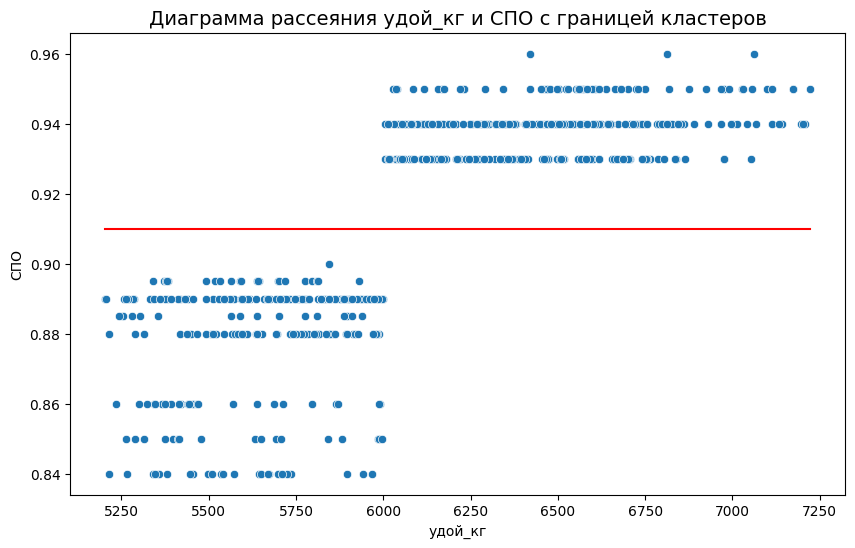

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=main['удой_кг'], y=main['СПО'])
plt.plot([5204, 7222], [0.91, 0.91], c='r')
plt.title('Диаграмма рассеяния удой_кг и СПО с границей кластеров', fontsize=14)
plt.show()

`СПО` и `удой_кг` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `СПО`, которое можно считать границей между кластерами.

In [ ]:
main['СПО_уровень'] = main['СПО'].apply(lambda x: 'высокий' if x>0.91 else 'низкий').astype('category') 

Чтобы устранить нелинейность, `СПО` был преобразован в категориальный бинарный признак, использовав границу в виде значения 0.91. Добавим категориальный признак `СПО_уровень` вместе с `ЭКЕ`.

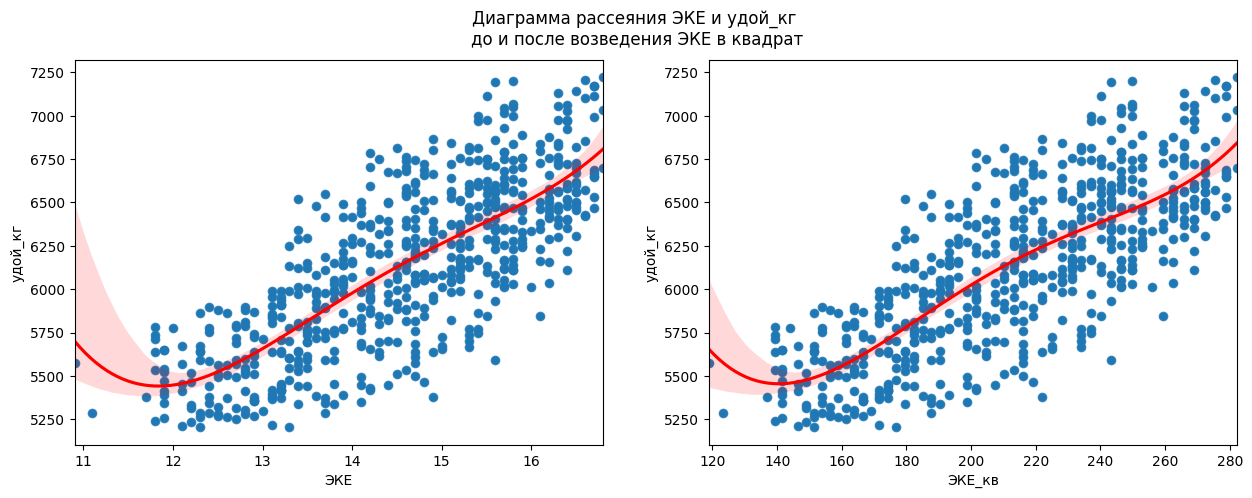

In [ ]:
plt.figure(figsize=(15, 5))
plt.suptitle('Диаграмма рассеяния ЭКЕ и удой_кг \nдо и после возведения ЭКЕ в квадрат')

plt.subplot(1, 2, 1)
sns.scatterplot(x=main['ЭКЕ'], y=main['удой_кг'])
sns.regplot(x=main['ЭКЕ'], y=main['удой_кг'], order=4, line_kws=dict(color="r"))

plt.subplot(1, 2, 2)
main['ЭКЕ_кв'] = main['ЭКЕ']**2
sns.scatterplot(x=main['ЭКЕ_кв'], y=main['удой_кг'])
sns.regplot(x=main['ЭКЕ_кв'], y=main['удой_кг'], order=4, line_kws=dict(color="r"))

plt.show()

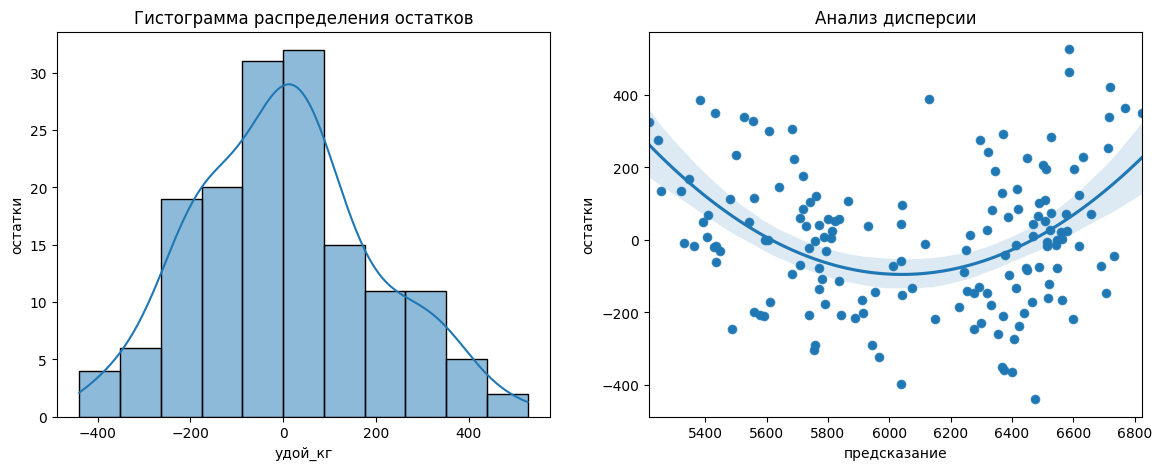

MAE: 149.72
RMSE: 190.28
R2: 0.835
Доверительный интервал: (-352.05, 386.41)


In [ ]:
cat_col_1 = ['более_2_лет', 'тип_пастбища', 'порода', 'порода_папы_быка', 'СПО_уровень']
num_col_1 = ['ЭКЕ_кв', 'сырой_протеин_г']

encoder_1, scaler_1, model_lr_1 = linear_regression(cat_col_1, num_col_1)

Гистограмма распределения остатков показывает, что модель завышает прогнозные значения. Попробуем добавить входной признак и посмотреть, как будут распределены остатки.

### Подготовка данных и обучение на них третьей модели

In [ ]:
main = main.merge(dad, on='id')
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 0 to 622
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                623 non-null    int64   
 1   удой_кг           623 non-null    int64   
 2   ЭКЕ               623 non-null    float64 
 3   сырой_протеин_г   623 non-null    int64   
 4   СПО               623 non-null    float64 
 5   порода            623 non-null    category
 6   тип_пастбища      623 non-null    category
 7   порода_папы_быка  623 non-null    category
 8   жирность_%        623 non-null    float64 
 9   белок_%           623 non-null    float64 
 10  вкусное_молоко    623 non-null    bool    
 11  более_2_лет       623 non-null    bool    
 12  СПО_уровень       623 non-null    category
 13  ЭКЕ_кв            623 non-null    float64 
 14  имя_папы          623 non-null    category
dtypes: bool(2), category(5), float64(5), int64(3)
memory usage: 48.7 KB


В датасет **`main`** был добавлен признак `имя_папы` из таблицы **`dad`**. Слияние не добавило пропусков в датасет. Добавим признак `имя_папы` в модель.

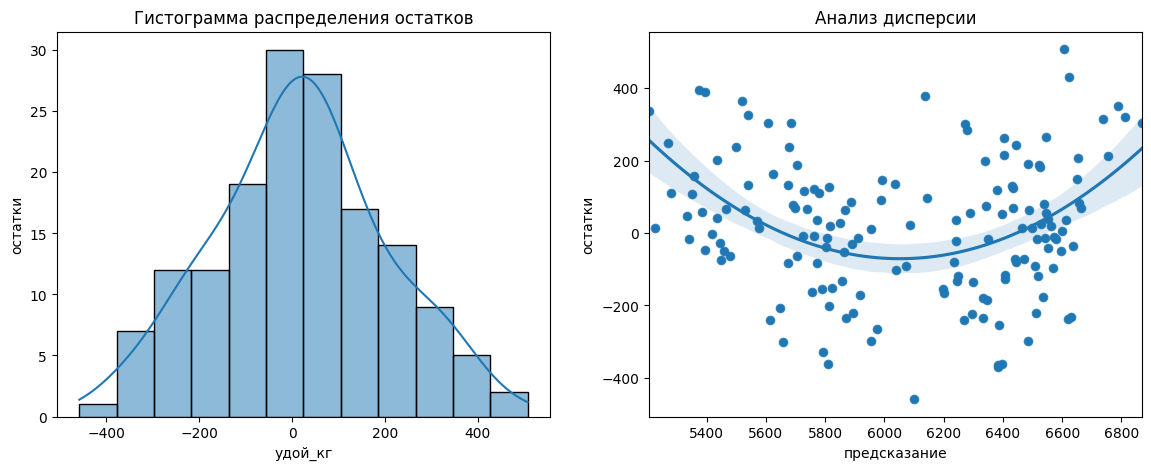

MAE: 146.72
RMSE: 186.41
R2: 0.841
Доверительный интервал: (-360.63, 380.44)


In [ ]:
cat_col_2 = ['более_2_лет', 'тип_пастбища', 'порода', 'порода_папы_быка', 'СПО_уровень', 'имя_папы']
num_col_2 = ['ЭКЕ_кв', 'сырой_протеин_г']

encoder_2, scaler_2, model_lr_2 = linear_regression(cat_col_2, num_col_2)

Модель линейной регрессии лучше уловила связь входных признаков с целевым. Гистограмма больше напоминает нормальное распределение, но от завышения прогнозных значений избавиться не удалось. 

### Сравнение качества трёх моделей линейной регрессии

1. Первая модель:
    - Входные признаки:
        - `ЭКЕ`
        - `сырой_протеин_г`
        - `более_2_лет`
        - `тип_пастбища`
        - `порода`
        - `порода_папы_быка`
    - Метрики
        - MAE: 190.36
        - RMSE: 242.2
        - R2: 0.732

   
2. Вторая модель:
    - Входные признаки:
        - Был добавлен преобразованный в бинарный признак `СПО_уровень`
    - Метрики
        - MAE: 151.03
        - RMSE: 192.15
        - R2: 0.835
   

2. Метрики третьей модели:
    - Входные признаки:
        - Был добавлен входной признак `имя_папы` из таблицы **`dad`**
    - Метрики
        - MAE: 148.35
        - RMSE: 188.81
        - R2: 0.841
        
        
**Вывод:** хуже всего определяет целевой признак первая модель. Третья модель по метрикам похожа на вторую, но незначительно показывает себя лучше, её доверительный интервал равен (-360.63, 380.44). Продолжим работу с **третьей моделью**, её входные признаки схожи с таблицей **`dad`**, целевой столбец в которой предстоит предсказать. 

### Прогнозированние удоя коров, которых хочет купить фермер

#### Добавления признаков

Добавим в датасет входные признаки: `СПО_уровень`, `ЭКЕ_кв`, `сырой_протеин_г`. Так как для новых коров планируется увеличить значения каждого из этих параметров на 5%, то найдем средние значения и увеличим их на 5%.

In [ ]:
pivot_table_spo = (main.groupby(['более_2_лет', 'тип_пастбища', 'порода_папы_быка'])['СПО'].mean()
                   .reset_index()
                   .assign(СПО=lambda x: x['СПО']*1.05)) # увеличение на 5%

display(pivot_table_spo)

cow_buy = cow_buy.merge(pivot_table_spo,
              on=['более_2_лет', 'тип_пастбища', 'порода_папы_быка'],
              how='left')

cow_buy.info()

более_2_лет тип_пастбища порода_папы_быка       СПО
0        False    равнинное           Айдиал  0.919275
1        False    равнинное          Соверин  0.917673
2        False    холмистое           Айдиал  0.935250
3        False    холмистое          Соверин  0.915453
4         True    равнинное           Айдиал  0.972037
5         True    равнинное          Соверин  0.961188
6         True    холмистое           Айдиал  0.969112
7         True    холмистое          Соверин  0.966240

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   порода              20 non-null     category
 1   тип_пастбища        20 non-null     category
 2   порода_папы_быка    20 non-null     category
 3   имя_папы            20 non-null     category
 4   текущая_жирность_%  20 non-null     float64 
 5   текущий_белок_%     20 non-null     float64 
 6   более_2_лет         20 non-null     bool    
 7   СПО                 20 non-null     float64 
dtypes: bool(1), category(4), float64(3)
memory usage: 1.3 KB


Из корреляционного анализа было замечено влияние категориальных признаков `более_2_лет`, `тип_пастбища`, `порода_папы_быка` для диаграмм рассеяния `СПО` и `удой_кг` в таблице **`main`**. Данные столбцы были использованы для нахождения среднего `СПО`. После склейки таблиц, пропуски не появились.

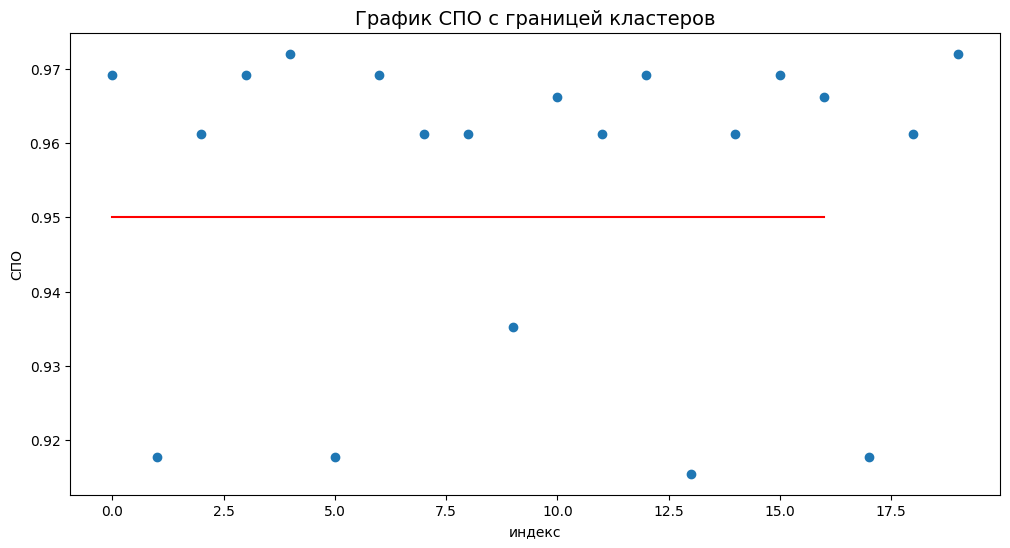

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(range(len(cow_buy['СПО'])), cow_buy['СПО'])
plt.plot([0, 16], [0.95, 0.95], c='r')
plt.title('График СПО с границей кластеров', fontsize=14)
plt.xlabel('индекс')
plt.ylabel('СПО')

plt.show()

In [ ]:
cow_buy['СПО_уровень'] = cow_buy['СПО'].apply(lambda x: 'высокий' if x > 0.95 else 'низкий').astype('category')

Определим границу кластеров в 0.95 `СПО` и создадим бинарный признак `СПО_уровень`.

In [ ]:
pivot_table_eke = (main.groupby(['порода_папы_быка', 'СПО_уровень', 'более_2_лет', 'тип_пастбища'])['ЭКЕ'].median()
                   .reset_index()
                   .assign(ЭКЕ_кв=lambda x: round(x['ЭКЕ']*1.05, 2)**2)) # увеличение на 5%

display(pivot_table_eke)

cow_buy = cow_buy.merge(pivot_table_eke,
              on=['порода_папы_быка', 'СПО_уровень', 'более_2_лет', 'тип_пастбища'],
              how='left')

cow_buy.info()

порода_папы_быка СПО_уровень  более_2_лет тип_пастбища    ЭКЕ    ЭКЕ_кв
0            Айдиал     высокий        False    равнинное    NaN       NaN
1            Айдиал     высокий        False    холмистое    NaN       NaN
2            Айдиал     высокий         True    равнинное  15.30  258.2449
3            Айдиал     высокий         True    холмистое  15.20  254.7216
4            Айдиал      низкий        False    равнинное  12.90  183.6025
5            Айдиал      низкий        False    холмистое  13.40  197.9649
6            Айдиал      низкий         True    равнинное  13.40  197.9649
7            Айдиал      низкий         True    холмистое  13.15  190.7161
8           Соверин     высокий        False    равнинное  13.40  197.9649
9           Соверин     высокий        False    холмистое    NaN       NaN
10          Соверин     высокий         True    равнинное  15.65  269.9449
11          Соверин     высокий         True    холмистое  15.60  268.3044
12          Соверин      низкий        False    равнинное  12.80  180.6336
13          Соверин      низкий        False    холмистое  13.10  189.3376
14          Соверин      низкий         True    равнинное  13.85  211.4116
15          Соверин      низкий         True    холмистое  14.10  219.0400

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   порода              20 non-null     category
 1   тип_пастбища        20 non-null     category
 2   порода_папы_быка    20 non-null     category
 3   имя_папы            20 non-null     category
 4   текущая_жирность_%  20 non-null     float64 
 5   текущий_белок_%     20 non-null     float64 
 6   более_2_лет         20 non-null     bool    
 7   СПО                 20 non-null     float64 
 8   СПО_уровень         20 non-null     category
 9   ЭКЕ                 20 non-null     float64 
 10  ЭКЕ_кв              20 non-null     float64 
dtypes: bool(1), category(5), float64(5)
memory usage: 1.7 KB


С помощью категориальных признаков `порода_папы_быка`, `СПО_уровень`, `более_2_лет`, `тип_пастбища` были найдены медианные значения `ЭКЕ`, которые были увеличены на 5%. Пропусков в датасете cow_buy после слияния не появилось.

In [ ]:
pivot_table_spg = (main.groupby(['порода_папы_быка', 'СПО_уровень', 'более_2_лет', 'тип_пастбища'])['сырой_протеин_г'].median()
                   .reset_index()
                   .assign(сырой_протеин_г=lambda x: round(x['сырой_протеин_г']*1.05))) # увеличение на 5%

display(pivot_table_spg)

cow_buy = cow_buy.merge(pivot_table_spg,
              on=['порода_папы_быка', 'СПО_уровень', 'более_2_лет', 'тип_пастбища'],
              how='left')

cow_buy.info()

порода_папы_быка СПО_уровень  более_2_лет тип_пастбища  сырой_протеин_г
0            Айдиал     высокий        False    равнинное              NaN
1            Айдиал     высокий        False    холмистое              NaN
2            Айдиал     высокий         True    равнинное           1994.0
3            Айдиал     высокий         True    холмистое           2058.0
4            Айдиал      низкий        False    равнинное           1827.0
5            Айдиал      низкий        False    холмистое           1873.0
6            Айдиал      низкий         True    равнинное           1900.0
7            Айдиал      низкий         True    холмистое           1908.0
8           Соверин     высокий        False    равнинное           1935.0
9           Соверин     высокий        False    холмистое              NaN
10          Соверин     высокий         True    равнинное           2190.0
11          Соверин     высокий         True    холмистое           2128.0
12          Соверин      низкий        False    равнинное           1890.0
13          Соверин      низкий        False    холмистое           1881.0
14          Соверин      низкий         True    равнинное           1883.0
15          Соверин      низкий         True    холмистое           1906.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   порода              20 non-null     category
 1   тип_пастбища        20 non-null     category
 2   порода_папы_быка    20 non-null     category
 3   имя_папы            20 non-null     category
 4   текущая_жирность_%  20 non-null     float64 
 5   текущий_белок_%     20 non-null     float64 
 6   более_2_лет         20 non-null     bool    
 7   СПО                 20 non-null     float64 
 8   СПО_уровень         20 non-null     category
 9   ЭКЕ                 20 non-null     float64 
 10  ЭКЕ_кв              20 non-null     float64 
 11  сырой_протеин_г     20 non-null     float64 
dtypes: bool(1), category(5), float64(6)
memory usage: 1.9 KB


#### Прогнозирование удоя

In [ ]:
cat_col_2 = ['более_2_лет', 'тип_пастбища', 'порода', 'порода_папы_быка', 'СПО_уровень', 'имя_папы']
num_col_2 = ['ЭКЕ_кв', 'сырой_протеин_г']

cow_buy_ohe = encoder_2.transform(cow_buy[cat_col_2])
cow_buy_scaled = scaler_2.transform(cow_buy[num_col_2])

cow_buy_ohe = pd.DataFrame(data=cow_buy_ohe, columns=encoder_2.get_feature_names_out())
cow_buy_scaled = pd.DataFrame(data=cow_buy_scaled, columns=num_col_2)

X_cow_buy = pd.concat([cow_buy_scaled, cow_buy_ohe], axis=1)

predictions = model_lr_2.predict(X_cow_buy)

predictions = pd.DataFrame(data=predictions, columns=['удой_кг']).astype(int)

cow_buy = pd.concat([cow_buy, predictions], axis=1)

In [ ]:
cow_buy.iloc[:, -5:]

СПО_уровень    ЭКЕ    ЭКЕ_кв  сырой_протеин_г  удой_кг
0      высокий  15.20  254.7216           2058.0     6708
1       низкий  12.80  180.6336           1890.0     5738
2      высокий  15.65  269.9449           2190.0     6482
3      высокий  15.20  254.7216           2058.0     6698
4      высокий  15.30  258.2449           1994.0     6642
5       низкий  12.80  180.6336           1890.0     5823
6      высокий  15.20  254.7216           2058.0     6708
7      высокий  15.65  269.9449           2190.0     6755
8      высокий  15.65  269.9449           2190.0     6482
9       низкий  13.40  197.9649           1873.0     5849
10     высокий  15.60  268.3044           2128.0     6509
11     высокий  15.65  269.9449           2190.0     6839
12     высокий  15.20  254.7216           2058.0     6708
13      низкий  13.10  189.3376           1881.0     5517
14     высокий  15.65  269.9449           2190.0     6482
15     высокий  15.20  254.7216           2058.0     6698
16     высокий  15.60  268.3044           2128.0     6509
17      низкий  12.80  180.6336           1890.0     5823
18     высокий  15.65  269.9449           2190.0     6755
19     высокий  15.30  258.2449           1994.0     6642

В датасет **`cow_buy`** были добавлены три входных признака, увеличенные на 5%. `СПО` был преобразован в `СПО_уровень`, котегориальные и количественные признаки были подготовлены. Обученной моделью линейной регрессии был спрогназирован целевой столбец `удой_кг`.

## Обучение модели логистической регрессии

### Подготовка данных и обучение на них модели

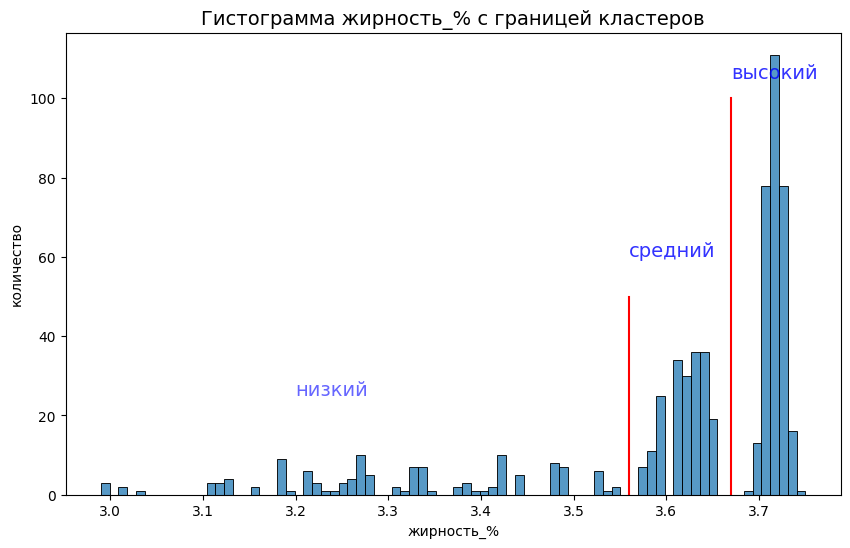

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(main['жирность_%'], bins=80)

plt.plot([3.56, 3.56], [0, 50], c='r')
plt.plot([3.67, 3.67], [0, 100], c='r')
plt.text(x=3.2, y=25, s="низкий", fontsize=14, c='blue', alpha=0.60)
plt.text(x=3.56, y=60, s="средний", fontsize=14, c='blue', alpha=0.80)
plt.text(x=3.67, y=105, s="высокий", fontsize=14, c='blue', alpha=0.80)

plt.title('Гистограмма жирность_% с границей кластеров', fontsize=14)
plt.ylabel('количество')
plt.show()

In [ ]:
main['уровень_жирности'] = (pd.cut(main['жирность_%'],
                                  bins=[0, 3.56, 3.67, 4],
                                  labels=['низкий', 'средний', 'высокий'])).astype('category')

cow_buy['уровень_жирности'] = (pd.cut(cow_buy['текущая_жирность_%'],
                                  bins=[0, 3.56, 3.67, 4],
                                  labels=['низкий', 'средний', 'высокий'])).astype('category')

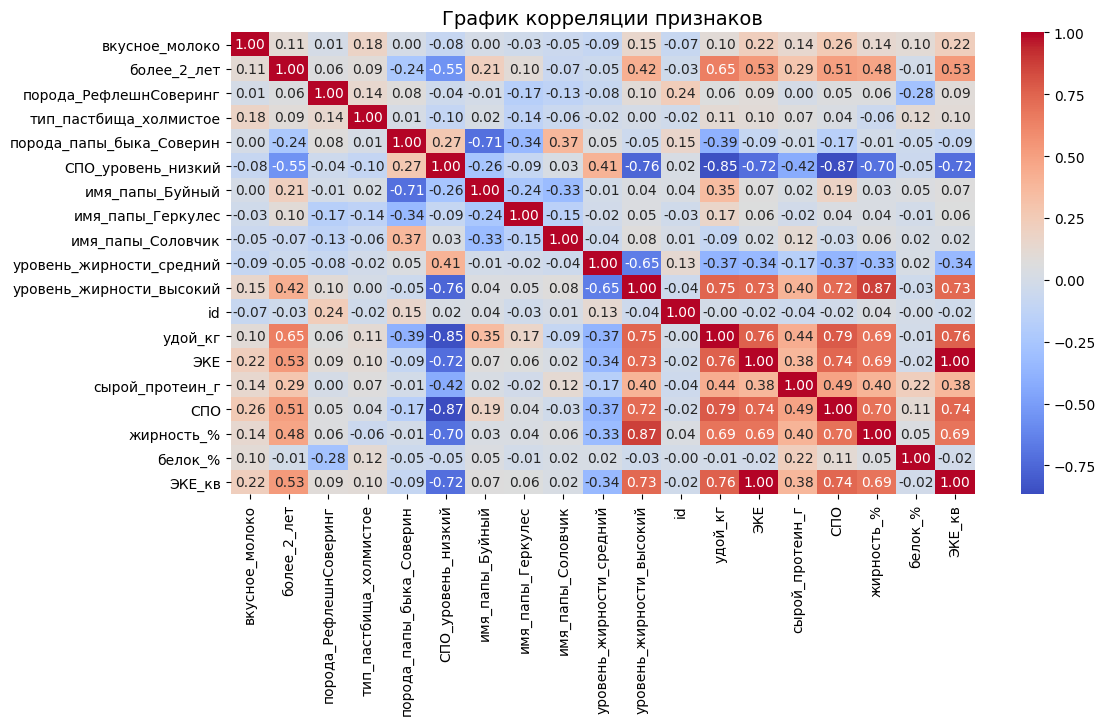

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap((pd.concat([pd.get_dummies(main[main.select_dtypes(['bool', 'category']).columns], drop_first=True),
                        main[main.select_dtypes(['int', 'float']).columns]], axis=1))
            .corr('spearman'), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f')
plt.title('График корреляции признаков', fontsize=14)
plt.show()

вкусное_молоко не имеет корреляции ни с одним из признаков.

Отбор признаков:
1. `более_2_лет`
2. `порода`
3. `тип_пастбища`
4. `порода_папы_быка`
5. `ЭКЕ`
6. `сырой_протеин_г`
7. `жирность_%`
8. `белок_%`

In [ ]:
RANDOM_STATE = 42

cat_col_class = ['более_2_лет', 'порода', 'тип_пастбища', 'порода_папы_быка', 'уровень_жирности']
num_col_class = ['ЭКЕ_кв', 'сырой_протеин_г', 'белок_%']

X = main.drop('вкусное_молоко', axis=1)
y = main['вкусное_молоко']

# Подготовка данных
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

X_train_ohe, X_test_ohe, encoder_log = encoder_category(X_train, X_test, cat_col_class) 
X_train_num, X_test_num, scaler_log = standard_num(X_train, X_test, num_col_class)

X_train = pd.concat([X_train_num, X_train_ohe], axis=1)
X_test = pd.concat([X_test_num, X_test_ohe], axis=1)

# Обучение и применение модели логистической регрессии
model_log = LogisticRegression()
model_log.fit(X_train, y_train)
prediction = model_log.predict(X_test)
prediction_p = model_log.predict_proba(X_test)[:, 1] # Вероятности принадлежности к классу 1

print(f'accuracy: {accuracy_score(y_test, prediction):.2f}')
print(f'precision: {precision_score(y_test, prediction):.2f}')
print(f'recall: {recall_score(y_test, prediction):.2f}')

accuracy: 0.59
precision: 0.60
recall: 0.79


Для моделей классификации при анализе рисков или экономических рассчетов важны метрики precision и recall. Точность, с которой модель присваивает объектам класс 1 равна 0.60, присвоение первому классу класс 1 равна 0.79. 

### Выбор критичной ошибки и её минимизация

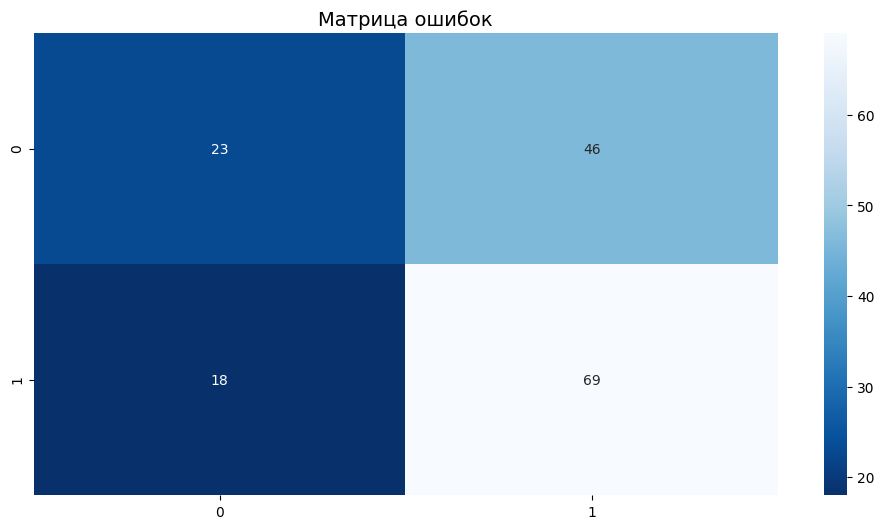

In [ ]:
plt.figure(figsize=(12, 6))

sns.heatmap(confusion_matrix(y_test, prediction),
            annot=True,
            fmt='d',
            cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=14)
plt.show()

В данной задаче ошибка первого рода критичнее, чтобы заказчик не купил корову, которая дает невкусное молоко. Нам необходимо минимизировать назначение класса 1 классу 0. В этом нам поможет увеличение метрики precision.

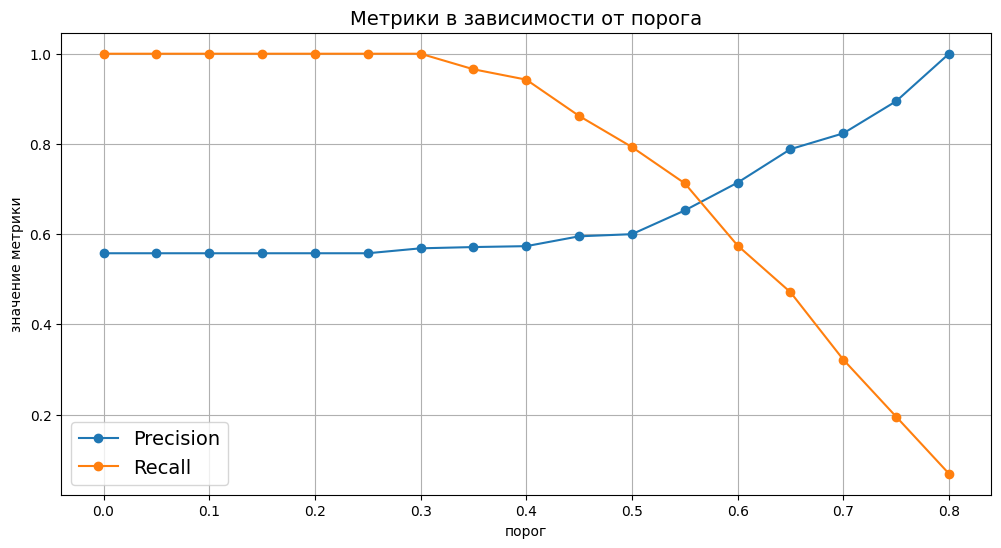

In [ ]:
thresholds =  np.arange(0, 0.85, 0.05)
precision_lst = []
recall_lst = []

for threshold in thresholds:
    y_pred = (prediction_p >= threshold).astype(int)
    precision_lst.append(precision_score(y_test, y_pred))
    recall_lst.append(recall_score(y_test, y_pred))
    
plt.figure(figsize=(12, 6))

plt.plot(thresholds, precision_lst, label="Precision", marker='o')
plt.plot(thresholds, recall_lst, label="Recall", marker='o')
plt.xlabel("порог")
plt.ylabel("значение метрики")
plt.title("Метрики в зависимости от порога", fontsize=14)
plt.grid()
plt.legend(fontsize=14)

plt.show()

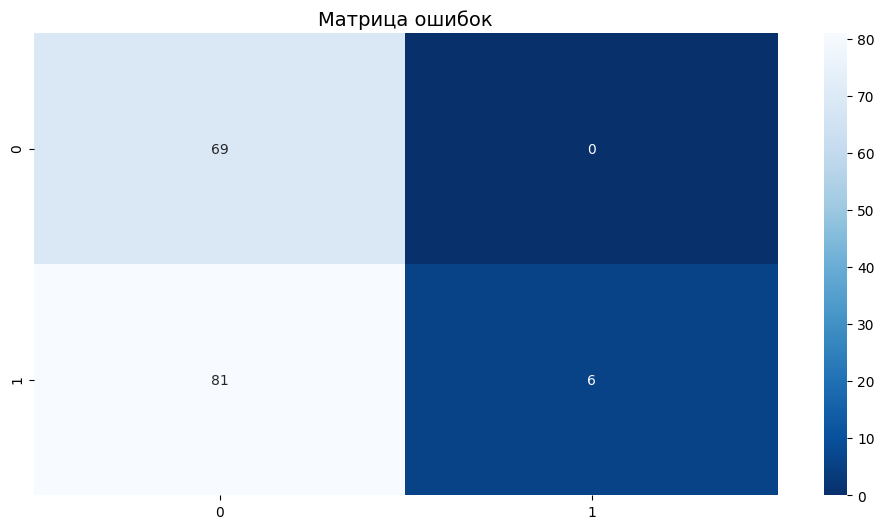

accuracy: 0.48
precision: 1.00
recall: 0.07


In [ ]:
plt.figure(figsize=(12, 6))
y_pred_0_8 = (prediction_p >= 0.8).astype(int)

sns.heatmap(confusion_matrix(y_test, y_pred_0_8),
            annot=True,
            fmt='d',
            cmap='Blues_r')
plt.title('Матрица ошибок', fontsize=14)
plt.show()

print(f'accuracy: {accuracy_score(y_test, y_pred_0_8):.2f}')
print(f'precision: {precision_score(y_test, y_pred_0_8):.2f}')
print(f'recall: {recall_score(y_test, y_pred_0_8):.2f}')

С увеличением метрики precision модель логистической регрессии не будет ошибочно предсказывать классу 'невкусное молоко' вкусное. Таким образом, заказчик не купит корову с невкусным молоком. Но значительно упускаются коровы, которые имеют 'вкусное молоко' и были классифицированы, как невкусное.

### Прогнозирование вкусности молока

In [ ]:
cow_buy.rename(columns={'текущий_белок_%': 'белок_%'}, inplace=True)

cat_col_class_cow_buy = ['более_2_лет', 'порода', 'тип_пастбища', 'порода_папы_быка', 'уровень_жирности']
num_col_class_cow_buy = ['ЭКЕ_кв', 'сырой_протеин_г', 'белок_%']


# Подготовка данных
cow_buy_ohe = encoder_log.transform(cow_buy[cat_col_class_cow_buy])
cow_buy_scaled = scaler_log.transform(cow_buy[num_col_class_cow_buy])

cow_buy_ohe = pd.DataFrame(data=cow_buy_ohe, columns=encoder_log.get_feature_names_out())
cow_buy_scaled = pd.DataFrame(data=cow_buy_scaled, columns=num_col_class_cow_buy)

X_cow_buy = pd.concat([cow_buy_scaled, cow_buy_ohe], axis=1)

# Предсказание таргета
predictions_log = pd.DataFrame(data=(model_log.predict_proba(X_cow_buy)[:, 1]), columns=['вероятность_вкусного_молока'])
cow_buy = pd.concat([cow_buy, predictions_log], axis=1)

In [ ]:
cow_buy['вкусное_молоко'] = cow_buy['вероятность_вкусного_молока'] > 0.8
cow_buy.iloc[:, -2:].sort_values('вероятность_вкусного_молока', ascending=False)

вероятность_вкусного_молока  вкусное_молоко
16                     0.842588            True
7                      0.775401           False
0                      0.775280           False
6                      0.775280           False
2                      0.680715           False
8                      0.680715           False
14                     0.680715           False
18                     0.666108           False
11                     0.662042           False
9                      0.643435           False
13                     0.617372           False
15                     0.613527           False
19                     0.606523           False
4                      0.606523           False
1                      0.562109           False
3                      0.551797           False
10                     0.537986           False
12                     0.334157           False
5                      0.144151           False
17                     0.141568           False

Только одна корова точно имеет вкусное молоко. Малое количество положительных предсказаний связано с частым ошибочным классифицированием класса 1, как класс 0.

## Итоговые выводы

1. ETL-процессы: названия столбцов таблиц были приведены к стандартам оформления, пропуски отсутствуют в данных, дубликаты в таблицах **`main`** и **`cow_buy`** были удалены, типы данных изменены. 


2. EDA: в таблице **`main`** аномальные значения столбцов `удой_кг` и `белок_%` были удалены фильтром, выбросы столбца `жирность_%` было решено оставить. Все категориальные столбцы имеют бинарный признак. Корова старше 2 лет в 83% наблюдений. Буренка с породой папы быка "Айдиал" имеет больший удой за год, молодые коровы несут меньше молока, чем зрелые. \
В таблице **`cow_buy`** аномальные значения отсутствуют, все категориальные столбцы, кроме `имя_папы` имеют бинарный признак. 

- Связь признаков с целевыми переменными:
    - Для задачи регрессии (`удой_кг`):
        - Высокая связь с `СПО` (0.79) и `ЭКЕ` (0.76).
        - Заметная связь с `более_2_лет` (0.65) и `жирность_%` (0.69).
    - Для задачи классификации (`вкусное_молоко`):
        - Слабая связь со всеми признаками.
       
       
- Типы взаимосвязи между `удой_кг` и всеми входными количественными признаками:
    - При значении 'False' категориального признака `более_2_лет`, `удой_кг` не имеет корреляцию со всеми количественными признаками.
    - Прямая положительная связь с `ЭКЕ`
    - Слабая положительная связь с `сырой_протеин_г`
    - Нелинейная положительная связь с `СПО`
    - Нелинейная умеренная положительная связь с `жирность_%`
    - Отсутствие связи с `белок_%`
    

- Мультиколлинеарность:
    - Высокая связь между `ЭКЕ` и `СПО` (0.74).
    - Заметная связь между `ЭКЕ` и `жирность_%` (0.69), а также между `СПО` и `жирность_%` (0.70).
    
   
3. Отбор коров: только одна корова имеет вкусное молоко. Её Фермер с минимальным ризком для себя может купить, возможный годовой удой которой - около 6500 кг. Если фермеру нужно больше коров, то можно присмотреться к 7, 0 и 6 индексу из таблицы cow_buy, но с дополнительной проверкой вкусности молока. Для большего удоя рекомендуется брать взрослую буренку.


4. Выводы о моделях линейной регрессии и логистической регрессии: Для улучшения качества модели линейной регрессии был преобразован входной признак `СПО` в бинарный и добавлен новый столбец `имя_папы` из таблицы **`dad`**. Модель всё еще завышает прогнозные значения. Рекомендуется для улучшения моделей добавить входные признаки и/или транспонировать существующие.